Aluno: Victor Gabriel Tenório Oliveira 

Projeto_2VA

---
<!-- <a href="https://colab.research.google.com/drive/1SA-V3pNHgztdJ1R3UwzdljODLfDXNmgN?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> -->
<a href="http://www.iapr-tc11.org/mediawiki/index.php/MSRA_Text_Detection_500_Database_(MSRA-TD500)" target="_parent"><img src="https://img.shields.io/badge/Download-MSRA--TD500-orange" alt="Site with Download Dataset Link"/></a>

Direct download MSRA-TD500 dataset [here](http://www.iapr-tc11.org/dataset/MSRA-TD500/MSRA-TD500.zip)

#### Configuração inicial 
  - Carrega repositório do github (Dataset no github possui imagens adicionais)
  - Import bibliotecas
  - Carrega imagens
  - Define funções úteis

In [ ]:
!git clone https://github.com/VictorG-028/Dataset-Detectar-Texto.git

fatal: destination path 'Dataset-Detectar-Texto' already exists and is not an empty directory.


In [ ]:
!pip install evidently --quiet
!pip install facets-overview --quiet
!pip install yfinance --quiet

!sudo apt-get install tesseract-ocr --quiet
!pip install pytesseract --quiet
# !pip install pytesseract==0.3.9 --quiet
# import os
# os.kill(os.getpid(), 9)

Reading package lists...
Building dependency tree...
Reading state information...
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


In [ ]:
import math
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
import glob
import os
import pytesseract
from PIL import Image
from google.colab import files as file_downloader
from time import sleep


# Enable Widgets
# https://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html
from google.colab import output
output.enable_custom_widget_manager()

# Widget Modules
from ipywidgets import interact, interactive, IntSlider, SelectionSlider, Dropdown, Checkbox
import ipywidgets as w
from evidently.dashboard import Dashboard
from evidently.dashboard.tabs import DataDriftTab
import yfinance as yf

from IPython.core.display import display, HTML
import base64

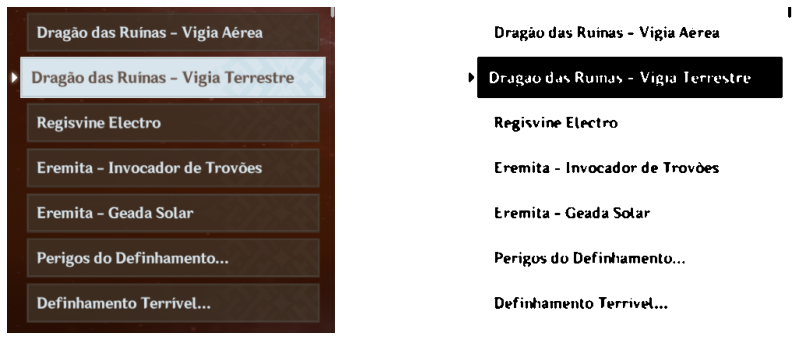

In [ ]:
# Variáveis
genshin_dir                        = "/content/Dataset-Detectar-Texto/imgs/Genshin/"
MSRA_dir                           = "/content/Dataset-Detectar-Texto/imgs/MSRA-TD500/"
part_1_dir                         = "/content/Dataset-Detectar-Texto/imgs/Thresholded-Images-1/"
extensions                         = ['png', 'JPG']
offset                             = len(os.listdir(genshin_dir))
quantity_of_MSRA_samples_imgs_used = 8
pipeline_imgs                      = [] # Armazena o resultado de cada etapa da pipeline
temp                               = []
groups                             = 1
do_part_1                          = False
do_part_2                          = True
names_genshin                      = ["Genshin - Artefato Cálice", "Genshin - Inventário de armas", "Genshin - Terrorgumelo Emplumado", "Genshin - Registro de Tutorials Recente", "Genshin - Artefato Flor", "Genshin - Dragão das Ruínas - Vigia Aérea", "Genshin - Dragão das Ruínas - Vigia Terrestre", "Genshin - Intertwined Fate"]
names_MSRA                         = ["IMG_1715", "IMG_0861", "IMG_1764", "IMG_2163", "IMG_0723", "IMG_0059", "IMG_1800", "IMG_0694"]
DRAW_COLOR, THICKNESS              = (36, 255, 12), 2
MAX_PIXEL_VALUE                    = 255


if do_part_1:
  # Carregas as imagens da parte 1
  files = []
  [files.extend(glob.glob(genshin_dir + '*.' + e)) for e in extensions]
  [files.extend(glob.glob(MSRA_dir + '*.' + e)) for e in extensions]
  imgs_to_load = files[:offset + quantity_of_MSRA_samples_imgs_used]

  all_imgs = list(map(cv2.imread, imgs_to_load))


  # Mostra 2 imagens carregadas da parte 1
  fig, axes = plt.subplots(1, 2, figsize = (15, 6))
  for axe, img in zip(axes, [all_imgs[0], all_imgs[offset]]):
    axe.imshow(img)
    axe.set_axis_off()

# --- #

if do_part_2:
  # Carregas as imagens da parte 2
  files = []
  [files.extend(glob.glob(part_1_dir + '*.' + e)) for e in extensions]
  file_names = list(map(lambda file_path: int(file_path.split("/")[-1].split(".")[0]), files))

  file_original = []
  [file_original.extend(glob.glob(genshin_dir + name + '.png')) for name in names_genshin]
  [file_original.extend(glob.glob(MSRA_dir + name + '.JPG')) for name in names_MSRA]
  original_imgs = list(map(lambda file_name: cv2.imread(file_name), file_original))
  # original_imgs = list(map(lambda img: cv2.cvtColor(img, cv2.COLOR_BGR2RGB), original_imgs))

  # Ordena all_imgs por nome de arquivo
  temp_df = pd.DataFrame()
  temp_df["name"] = file_names
  temp_df["files"] = files
  temp_df.sort_values(by=["name"], inplace = True)
  sorted_file_names = list(temp_df["files"].values)
  all_imgs = list(map(lambda file_name: cv2.imread(file_name, cv2.IMREAD_GRAYSCALE), sorted_file_names))

  # Mostra 2 imagens carregadas da parte 2
  fig, axes = plt.subplots(1, 2, figsize = (15, 6))
  for axe, img in zip(axes, [original_imgs[3], all_imgs[19]]):
    axe.imshow(img, cmap="gray")
    # axe.imshow(img)
    axe.set_axis_off()

In [ ]:
def show_samples(imgs, offset, operation_name, t1 = "", t2 = ""):  
  samples = [imgs[0], imgs[offset]]
  fig, axes = plt.subplots(1, 2, figsize = (8, 11))
  for axe, img, t in zip(axes.ravel(), samples, [t1, t2]):
    axe.imshow(img, cmap='gray')
    # axe.set_axis_off()
    axe.tick_params(
        left=False,
        bottom=False,
        labelleft=False,
        labelbottom=False
    )
    axe.set_title(t)
    axe.set_ylabel(operation_name)



def _show_samples(img1, img2, operation_name, t1 = "", t2 = ""):
  fig, axes = plt.subplots(1, 2, figsize = (8, 11))
  for axe, img, t in zip(axes.ravel(), [img1, img2], [t1, t2]):
    axe.imshow(img, cmap='gray') if img is not None else axe.set_axis_off()
    # axe.set_axis_off()
    axe.tick_params(
        left=False,
        bottom=False,
        labelleft=False,
        labelbottom=False
    )
    axe.set_title(t)
    axe.set_ylabel(operation_name)



def show_sample(img):
  # if debug: print("aqui")
  # if convert_RGB2BGR and False:
  #   axe.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  #   # axe.imshow(img)
  # else:

  fig, axe = plt.subplots(1, 1, figsize = (8, 11))
  axe.imshow(img, cmap='gray')
  axe.set_axis_off()

### Primeira parte

#### 1. Operações na imagem
 - a) Converter para tons de cinza para processamento rápido e permitir binarização
 - b) Converter para L* a* b* e L* u* v* para os algoritmos de agrupamento

In [ ]:
if do_part_1:
  # a)
  convert_2_gray = lambda img: cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gray_imgs = list(map(convert_2_gray, all_imgs))

  # b)
  convert_2_Lab  = lambda img: cv2.cvtColor(img, cv2.COLOR_BGR2Lab)
  convert_2_Luv  = lambda img: cv2.cvtColor(img, cv2.COLOR_BGR2Luv)
  lab_imgs  = list(map(convert_2_Lab, all_imgs))
  luv_imgs  = list(map(convert_2_Luv, all_imgs))

  # Show result
  show_samples(gray_imgs, offset, "Convert to GRAY", "Dataset Genshin", "Dataset MSRA-TD500")
  show_samples(lab_imgs, offset, "Convert to L*a*b*")
  show_samples(luv_imgs, offset, "Convert to L*u*v*")

  print(len(pipeline_imgs))

#### 2. Operação no histograma
 - a) Equalização do histograma para aumentar a visibilidade das bordas das letras
 - b) Mudanças no brilho e no contraste com α ⋅ f(i,j) + β para testar variações da imagem que podem ser interessantes

In [ ]:
if do_part_1:
  # a) 
  temp.extend(
      list(map(cv2.equalizeHist, gray_imgs)) 
  )

  # b)
  alpha = 1.11   # Contraste
  beta  = -15     # Brilho
  change_contrast_and_brightness = lambda img: cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

  temp.extend(
      list(map(change_contrast_and_brightness, gray_imgs))
  )

  # Armazena resultado
  pipeline_imgs = temp
  temp = [] # reseta temp

  # Mostra resultado
  _show_samples(pipeline_imgs[0], pipeline_imgs[offset], "Equalização", "Dataset Genshin", "Dataset MSRA-TD500")
  _show_samples(pipeline_imgs[offset*2], pipeline_imgs[offset*3], "brilho e contraste\nα ⋅ f(i,j) + β")

  print(len(pipeline_imgs))

#### 3. Filtros Espaciais
 - Filtros (a) mediana, (b) média e (c) gaussiano para tentar facilitar a binarização

In [ ]:
if do_part_1:
  # a)
  median_mask_sizes = [3, 5]
  for s in median_mask_sizes:
    median_filter = lambda img: cv2.medianBlur(img, s)
    temp.extend(
        list(map(median_filter, pipeline_imgs))
    )
  l = len(temp)


  # b)
  mean_mask_sizes = [3, 5]
  masks = list(map(lambda size: np.ones((size,size), np.float32) / size**2, mean_mask_sizes))
  for m in masks:
    mean_filter = lambda img: cv2.filter2D(img, -1, m)
    temp.extend(
        list(map(mean_filter, pipeline_imgs))
    )
  l2 = len(temp)

  # c)
  gaussian_mask_sizes = [3, 5]
  for s in gaussian_mask_sizes:
    gaussian_filter = lambda img: cv2.GaussianBlur(img, (s, s), 0)
    temp.extend(
        list(map(mean_filter, pipeline_imgs))
    )

  # Armazena resultado
  pipeline_imgs = temp
  temp = [] # reseta temp

  # Mostra resultado
  # op = "mediana" if i < len(median_mask_sizes) else "média"
  # i = 0
  # _show_samples(pipeline_imgs[offset*i], pipeline_imgs[offset*(i+1)], f"Filtro mediana 3")
  # _show_samples(pipeline_imgs[offset*(i+2)], pipeline_imgs[offset*(i+3)], f"Filtro mediana 3")
  # i += 4
  # _show_samples(pipeline_imgs[offset*i], pipeline_imgs[offset*(i+1)], f"Filtro mediana 5")
  # _show_samples(pipeline_imgs[offset*(i+2)], pipeline_imgs[offset*(i+3)], f"Filtro mediana 5")
  # i += 4
  # _show_samples(pipeline_imgs[offset*i], pipeline_imgs[offset*(i+1)], f"Filtro média 3")
  # _show_samples(pipeline_imgs[offset*(i+2)], pipeline_imgs[offset*(i+3)], f"Filtro média 3")

  # Mostra resultado
  # l = int(len(pipeline_imgs)/2)
  show_samples(pipeline_imgs, offset, f"equalização +\n filtro mediana {median_mask_sizes[0]}", "Dataset Genshin", "Dataset MSRA-TD500")
  _show_samples(pipeline_imgs[l], pipeline_imgs[l+offset], f"equalização +\n filtro média {mean_mask_sizes[0]}")
  _show_samples(pipeline_imgs[l2], pipeline_imgs[l2+offset], f"equalização +\n filtro gaussiano {gaussian_mask_sizes[0]}")

  print(len(pipeline_imgs))

#### 4. Negativo

In [ ]:
if do_part_1: pipeline_imgs = list(map(lambda img: 255 - img, pipeline_imgs))

#### 5. Binarização
 - a) Limiar Global
 - b) Limiar Adaptativo Média
 - c) Limiar Adaptativo Gaussiana
 - d) Triangle
 - e) OTSU

In [ ]:
if do_part_1:
  #                  a   b   c     d     e
  thresholds   = [ 125,  6,   6,  100,  100] # [121 , 16,  8,  127, 55]
  matrix_sizes = [None,  15,  15, None, None]
  MAX_PIXEL_VALUE = 255
  l = len(pipeline_imgs)
  temp = []

  # a) Limiar Global
  threshold_global = lambda img: cv2.threshold(
    img, 
    thresholds[0], 
    MAX_PIXEL_VALUE,
    cv2.THRESH_BINARY
  )[1]
  temp.extend(
      list(map(threshold_global, pipeline_imgs))
  )

  # b) Limiar Adaptativo Média
  threshold_adaptative_mean = lambda img: cv2.adaptiveThreshold(
      img, 
      MAX_PIXEL_VALUE,
      cv2.ADAPTIVE_THRESH_MEAN_C,
      cv2.THRESH_BINARY, 
      matrix_sizes[1], 
      thresholds[1]  
  )
  temp.extend(
      list(map(threshold_adaptative_mean, pipeline_imgs))
  )

  # c) Limiar Adaptativo Gaussiana
  threshold_adaptative_gaussian = lambda img: cv2.adaptiveThreshold(
      img, 
      MAX_PIXEL_VALUE,
      cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
      cv2.THRESH_BINARY, 
      matrix_sizes[2], 
      thresholds[2]
  )
  temp.extend(
      list(map(threshold_adaptative_gaussian, pipeline_imgs))
  )

  # d) Triangle
  threshold_triangle = lambda img: cv2.threshold(
      img, 
      thresholds[3], 
      MAX_PIXEL_VALUE,
      cv2.THRESH_BINARY + cv2.THRESH_TRIANGLE
  )[1]
  temp.extend(
      list(map(threshold_triangle, pipeline_imgs))
  )

  # e) OTSU
  threshold_OTSU = lambda img: cv2.threshold(
      img, 
      thresholds[4], 
      MAX_PIXEL_VALUE,
      cv2.THRESH_BINARY + cv2.THRESH_OTSU
  )[1] # OTSU
  temp.extend(
      list(map(threshold_OTSU, pipeline_imgs))
  )

  # Armazena resultado
  pipeline_imgs = temp
  thresholded_images = temp.copy()
  temp = [] # reseta temp

  # Mostra resultados
  operations = ["Limiar Global", "Limiar Adaptativo Média", "Limiar Adaptativo Gaussiana", "Limiar Triangle", "Limiar OTSU"]
  for i, op in enumerate(operations):
    _show_samples(pipeline_imgs[i*l+1], pipeline_imgs[i*l+offset+1], op, "Dataset Genshin", "Dataset MSRA-TD500")

  print(len(pipeline_imgs))

#### 6. Salva imagens e faz o download das imagens binarizadas
  - As imagens binarizadas irão ser colocadas no girhub para facilitar  a etapa 2

In [ ]:
if do_part_1:
  print(len(pipeline_imgs))
  size = 30
  for index, img in enumerate(pipeline_imgs):
    # path = f"/content/Dataset-Detectar-Texto/imgs/pipeline_1/{index}.png"
    # path = os.path.join(os.path.expanduser('~'), 'content', 'pipeline_1', name)
    name = f"{index}.png"
    path = f"/content/pipeline_1/{name}"
    assert cv2.imwrite(path, img)
    # file_downloader.download(path)
    if (index != 0 and index % size == 0): sleep(10)

In [ ]:
## !zip -r /content/pipeline_1.zip /content/pipeline_1 --quiet
# !zip -r pipeline_1.zip /content/pipeline_1 --quiet
# sleep(3)
## file_downloader.download("/content/pipeline_1/pipeline_1")

#### 7. Visualiza imagens geradas na parte 1

In [ ]:
# pick_sample = 68
# _show_samples(all_imgs[0], all_imgs[8], "")
# _show_samples(all_imgs[1], all_imgs[9], "")
# _show_samples(all_imgs[4], all_imgs[12], "")
# _show_samples(pipeline_imgs[pick_sample], pipeline_imgs[pick_sample + offset], "")

if do_part_1:
  show_sample_by_index = lambda index: show_sample(pipeline_imgs[index])
  interact(
      show_sample_by_index,
      index = IntSlider(
                        min=0, 
                        max=len(pipeline_imgs)-1, 
                        step=16
                      )
  )

### Segunda parte

Nessa parte é aplicado filtros morfológicos, algoritmos de segmentação e binarização adaptativa como estratégia para reduzir ruído em alguns casos.

Lista de funções declaradas na parte 2:
 - a) Negativo
 - b) Threshold (Adaptativo média e Gaussiano)
 - c) Morfológicas (Dilate, Erode, Open, Close)
 - d) Segmentação (etiquetagem, watershed, Quadtree, K-means, Mean Shift)

<br>

 #### **Cada função possui parâmetros que podem ser escolhidos com os widgets iterativos abaixo.**

<br>

 #### **A segmentção é um parâmetro, então pode ser alterada. Para algumas segmentações é possível escolher desenhar o retângulo na imagem original, na imagem da parte 1 ou na imagem processada da parte 2.**

<br>

 #### Para cada uma das 16 imagens iniciais, foi escolhido uma imagem gerada na parte 1 e parâmetros para aplicar a segmentação. Isso resultou em 16 imagens finais mostradas abaixo.

 <br><br><br>

#### 1. Visualiza imagens geradas na parte 1 de forma iterativa

⚠ **Toque no Widget Slider para escolher uma imagem**

In [ ]:
if do_part_2:
  show_sample_by_index = lambda index: show_sample(all_imgs[index])
  interact(
      show_sample_by_index,
      index = IntSlider(
                        min   = 0,              # <---- 0 até 15 para escolher uma das 16 imagens iniciais
                        max   = len(all_imgs)-1, 
                        step  = 1              # <---- Colocar step = 16 para visualizar um grupo de variações da mesma imagem
                      )
  )

interactive(children=(IntSlider(value=0, description='index', max=959), Output()), _dom_classes=('widget-inter…

#### 2. Declara funções da segunda pipeline

Lista de funções declaradas na parte 2:
 - a) Negativo
 - b) Threshold (Adaptativo média e Gaussiano)
 - c) Morfológicas (Dilate, Erode, Open, Close)
 - d) Segmentação (etiquetagem, watershed, Quadtree, K-means, Mean Shift)


In [ ]:
# a)
pick_img = lambda index: all_imgs[index]

def apply_negative(img, negative = True):
  return 255 - img if negative else img

In [ ]:
# b)
def apply_threshold(img, thresh_type, threshold, matrix_size):
  
  threshold_functions = [
      lambda img: img,       # 0 - Não faz threshold
      cv2.threshold,         # 1 - Global
      cv2.adaptiveThreshold, # 2 - Adaptativo média
      cv2.adaptiveThreshold, # 3 - Adaptativo Gaussiano
      cv2.threshold,         # 4 - TRIANGLE
      cv2.threshold,         # 5 - OTSU
  ]

  threshold_args = [
      [img],
      [img, threshold, MAX_PIXEL_VALUE, cv2.THRESH_BINARY],
      [img, MAX_PIXEL_VALUE, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, matrix_size, threshold],
      [img, MAX_PIXEL_VALUE, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, matrix_size, threshold],
      [img, threshold, MAX_PIXEL_VALUE, cv2.THRESH_BINARY + cv2.THRESH_TRIANGLE],
      [img, threshold, MAX_PIXEL_VALUE, cv2.THRESH_BINARY + cv2.THRESH_OTSU],
  ]

  # args = threshold_args[thresh_type]
  # function = threshold_functions[thresh_type]
  if  thresh_type == 0 or thresh_type == 2 or thresh_type == 3:
    return threshold_functions[thresh_type](*threshold_args[thresh_type])
  else:
    return threshold_functions[thresh_type](*threshold_args[thresh_type])[1]

In [ ]:
# c)
def apply_dilate(img, morph_type, kernel_height, kernel_width, iterations = 1):
  morph_structures = [
      cv2.MORPH_CROSS,  # 0 = +
      cv2.MORPH_RECT,   # 1 = []
      cv2.MORPH_ELLIPSE # 2 = O
  ]
  mkernel = cv2.getStructuringElement(morph_structures[morph_type], (kernel_height, kernel_width))
  return cv2.dilate(img, mkernel, iterations)


def apply_dilate_simplified(img, morph_type, kernel_size, iterations = 1): # Menos inputs
  return apply_dilate(img, morph_type, kernel_size, kernel_size, iterations = 1)


def apply_erode(img, morph_type, kernel_height, kernel_width, iterations = 1):
  morph_structures = [
      cv2.MORPH_CROSS,  # 0 = +
      cv2.MORPH_RECT,   # 1 = []
      cv2.MORPH_ELLIPSE # 2 = O
  ]
  mkernel = cv2.getStructuringElement(morph_structures[morph_type], (kernel_height, kernel_width))
  return cv2.erode(img, mkernel, iterations)


def apply_erode_simplified(img, morph_type, kernel_size, iterations = 1): # Menos inputs
  return apply_erode(img, morph_type, kernel_size, kernel_size, iterations = 1)


def apply_open_or_close(img, open_or_close, morph_type, kernel_size, iterations):
  morph_structures = [
      cv2.MORPH_CROSS,  # 0 = +
      cv2.MORPH_RECT,   # 1 = []
      cv2.MORPH_ELLIPSE # 2 = O
  ]
  mkernel = cv2.getStructuringElement(morph_structures[morph_type], (kernel_size, kernel_size))
  modes = [
      None,           # 0 = Nada
      cv2.MORPH_OPEN, # 1 = Open
      cv2.MORPH_CLOSE # 2 = Close
  ]
  functions = [
      lambda img: img,  # 0 = Nada
      cv2.morphologyEx, # 1 = Open
      cv2.morphologyEx  # 2 = Close
  ]
  args = [
      [img],
      [img, modes[open_or_close], mkernel, iterations],
      [img, modes[open_or_close], mkernel, iterations]
  ]
  return functions[open_or_close](*args[open_or_close])


def apply_erode_or_dilate(img, erode_or_dilate, morph_type, kernel_height, kernel_width, iterations = 1):
  morph_structures = [
      cv2.MORPH_CROSS,  # 0 = +
      cv2.MORPH_RECT,   # 1 = []
      cv2.MORPH_ELLIPSE # 2 = O
  ]
  mkernel = cv2.getStructuringElement(morph_structures[morph_type], (kernel_height, kernel_width))
  functions = [
      lambda img: img, 
      cv2.erode, 
      cv2.dilate
  ]
  args = [
      [img],
      [img, mkernel, iterations],
      [img, mkernel, iterations]
  ]
  return functions[erode_or_dilate](*args[erode_or_dilate])

In [ ]:
# d)
def etiquetagem(img, draw, img_index):

  labeled_img = cv2.connectedComponents(img)[1]
  label_hue = np.uint8(179*labeled_img/np.max(labeled_img))
  blank_ch = 255*np.ones_like(label_hue)
  labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

  labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
  labeled_img[label_hue==0] = 0

  labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_BGR2RGB)

  out = [
      labeled_img,
      # original_imgs[img_index % 16].copy(),
      cv2.cvtColor(original_imgs[img_index % 16], cv2.COLOR_BGR2RGB).copy(),
      cv2.cvtColor(all_imgs[img_index], cv2.COLOR_GRAY2RGB).copy()
    ]
  out = out[draw]

  if (draw > 0):
    # out = original if draw == 1 else gray

    labels = np.unique(label_hue.ravel(), return_counts=False)
    # print(len(labels))
    # print(labels)
    for label in labels[1:]:
      # occurrences_of_label = (label_hue == label).ravel()
      # first_index = occurrences_of_label.argmax()
      # first_point = np.unravel_index(first_index, label_hue.shape)
  
      # last_index = occurrences_of_label.size - occurrences_of_label[::-1].argmax() -1
      # last_point = np.unravel_index(last_index, label_hue.shape)

      occurrences_of_label = np.argwhere(label_hue == label)
      (a,b), (c,d) = occurrences_of_label.min(0), occurrences_of_label.max(0)
      first_point = (b, a)
      last_point  = (d, c)

      # if label == 17: print(occurrences_of_label[::-1])
      # print(f" etiqueta -> {label} | first_point -> {first_point} | last_point -> {last_point}")
      # print(f"Desenhou {label} em ({first_point}, {last_point})")

      out = cv2.rectangle(out, first_point, last_point, DRAW_COLOR, THICKNESS)

  return out

################################################################################

def watershed(img, draw, img_index):

  # img = cv2.resize(img, None, fx = 5, fy = 5, interpolation = cv2.INTER_CUBIC)

  kernel = np.ones((3,3),np.uint8)
  opening = cv2.morphologyEx(img,cv2.MORPH_OPEN, kernel, iterations = 2)
  sure_bg = cv2.dilate(opening,kernel,iterations=3)


  euclidian_dist_transform = cv2.distanceTransform(img, cv2.DIST_L2, 3)
  # euclidian_dist_transform = cv2.normalize(euclidian_dist_transform, euclidian_dist_transform, 0, 1.0, cv2.NORM_MINMAX)
  sure_fg = cv2.threshold(euclidian_dist_transform, 0.2*euclidian_dist_transform.max(), 255, 0)[1]
  sure_fg = np.uint8(sure_fg)

  unknown = cv2.subtract(sure_bg, sure_fg)
  # print(unknown)
  # print(unknown==255)

  labeled_sure_fg = cv2.connectedComponents(sure_fg)[1]
  labeled_sure_fg = labeled_sure_fg + 1
  labeled_sure_fg[unknown==255] = 0

  img_bgr = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
  
  original = original_imgs[img_index % 16].copy()
  gray = cv2.cvtColor(all_imgs[img_index], cv2.COLOR_GRAY2RGB).copy()
  watershed = cv2.watershed(original, labeled_sure_fg)

  original[watershed == -1] = DRAW_COLOR
  gray[watershed == -1] = DRAW_COLOR

  out = [
      watershed,
      cv2.cvtColor(original, cv2.COLOR_BGR2RGB),
      # cv2.cvtColor(original_imgs[img_index % 16], cv2.COLOR_BGR2RGB).copy(),
      gray
    ]
  out = out[draw]

  # print(watershed)
  # print(labeled_sure_fg == -1)
  # print(img[labeled_sure_fg == -1])

  # print(watershed.shape)
  # watershed = cv2.cvtColor(watershed, cv2.COLOR_BGR2GRAY)
  # watershed = cv2.connectedComponents(watershed)[1]

  return out

################################################################################

# Classe do site https://jrtechs.net/photography/segmenting-images-with-quadtrees
# Classe foram um pouco modificadas
class Node():
  def __init__(self, x0, y0, w, h):
      self.x0 = x0
      self.y0 = y0
      self.width = w
      self.height = h
      self.children = []

  def get_width(self): return self.width
  def get_height(self): return self.height
  def get_points(self):return self.points
  def get_points(self, img): return img[self.x0:self.x0 + self.get_width(), self.y0:self.y0+self.get_height()]

  @staticmethod
  def get_error(node, img):
        pixels = node.get_points(img)

        b_avg = np.mean(pixels[:,:,0])
        b_mse = np.square(np.subtract(pixels[:,:,0], b_avg)).mean()
    
        g_avg = np.mean(pixels[:,:,1])
        g_mse = np.square(np.subtract(pixels[:,:,1], g_avg)).mean()
        
        r_avg = np.mean(pixels[:,:,2])
        r_mse = np.square(np.subtract(pixels[:,:,2], r_avg)).mean()
        
        e = r_mse * 0.2989 + g_mse * 0.5870 + b_mse * 0.1140
        
        return (e * img.shape[0]* img.shape[1])/90000000

  @staticmethod
  def get_error_gray(node, img):
    temp = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    pixels = node.get_points(temp)

    b_avg = np.mean(pixels[:,:,0])
    b_mse = np.square(np.subtract(pixels[:,:,0], b_avg)).mean()

    g_avg = np.mean(pixels[:,:,1])
    g_mse = np.square(np.subtract(pixels[:,:,1], g_avg)).mean()
    
    r_avg = np.mean(pixels[:,:,2])
    r_mse = np.square(np.subtract(pixels[:,:,2], r_avg)).mean()
    
    e = r_mse * 0.2989 + g_mse * 0.5870 + b_mse * 0.1140
    
    return (e * img.shape[0]* img.shape[1])/90000000

class QTree():
  def __init__(self, stdThreshold, minPixelSize, img):
      self.threshold = stdThreshold
      self.min_size = minPixelSize
      self.minPixelSize = minPixelSize
      self.img = img
      self.root = Node(0, 0, img.shape[0], img.shape[1])

  def get_points(self): 
    return img[self.root.x0:self.root.x0 + self.root.get_width(), self.root.y0:self.root.y0+self.root.get_height()]

  def recursive_subdivide(self, node, contrast, minPixelSize, img, error_function):

    # Condição de parada por contraste
    if error_function(node, img) <= contrast: 
        return
    w_1 = int(math.floor(node.width/2))
    w_2 = int(math.ceil(node.width/2))
    h_1 = int(math.floor(node.height/2))
    h_2 = int(math.ceil(node.height/2))


    if w_1 <= minPixelSize or h_1 <= minPixelSize:
        return
    x1 = Node(node.x0, node.y0, w_1, h_1) # top left
    self.recursive_subdivide(x1, contrast, minPixelSize, img, error_function)

    x2 = Node(node.x0, node.y0+h_1, w_1, h_2) # btm left
    self.recursive_subdivide(x2, contrast, minPixelSize, img, error_function)

    x3 = Node(node.x0 + w_1, node.y0, w_2, h_1)# top right
    self.recursive_subdivide(x3, contrast, minPixelSize, img, error_function)

    x4 = Node(node.x0+w_1, node.y0+h_1, w_2, h_2) # btm right
    self.recursive_subdivide(x4, contrast, minPixelSize, img, error_function)

    node.children = [x1, x2, x3, x4]

  def subdivide(self):
    # if self.img.shape == 2: # Imagem gray
    #   error_function = Node.get_error
    # else:
    #   error_function = Node.get_error_gray
    error_function = Node.get_error
    self.recursive_subdivide(self.root, self.threshold, self.minPixelSize, self.img, error_function)

  
  def find_children(self, node):
    if not node.children:
        return [node]
    else:
        children = []
        for child in node.children:
            children += (self.find_children(child))
    return children
  
  def graph_tree(self):
      fig = plt.figure(figsize=(10, 10))
      plt.title("Quadtree")
      c = self.find_children(self.root)
      print("Number of segments: %d" %len(c))
      for n in c:
          plt.gcf().gca().add_patch(patches.Rectangle((n.y0, n.x0), n.height, n.width, fill=False))
      plt.gcf().gca().set_xlim(0,img.shape[1])
      plt.gcf().gca().set_ylim(img.shape[0], 0)
      plt.axis('equal')
      plt.show()
      return

  def tree_2_img(self):
      imgc = self.img.copy()
      nodes = self.find_children(self.root)

      if len(imgc.shape) == 2:
        imgc = cv2.cvtColor(imgc, cv2.COLOR_GRAY2RGB)
      else:
        imgc = cv2.cvtColor(imgc, cv2.COLOR_BGR2RGB)

      for n in nodes:
          imgc = cv2.rectangle(imgc, (n.y0, n.x0), (n.y0+n.get_height(), n.x0+n.get_width()), DRAW_COLOR, 1)
      
      return imgc

def quadtree(img, draw, img_index, contrast_th, node_min_size = 3):
  original = original_imgs[img_index % 16].copy()
  qtTemp = QTree(contrast_th, node_min_size, original)
  qtTemp.subdivide()

  qtTemp.img = [
      np.full(qtTemp.img.shape, 255, dtype=np.uint8), # Substitui por uma imagem em branco
      qtTemp.img, # Sem substituição
      img # Substitui pela imagem cinza
  ][draw]
  
  out = [
      qtTemp.tree_2_img(),
      cv2.cvtColor(qtTemp.tree_2_img(), cv2.COLOR_BGR2RGB),
      qtTemp.tree_2_img()
  ]
  out = out[draw]

  return out


################################################################################
def k_means(img, draw, img_index, K, LAB_or_LUV):

  original = original_imgs[img_index % 16].copy()

  # Converte para LAB ou LUV
  input = cv2.cvtColor(original, cv2.COLOR_BGR2Lab) if LAB_or_LUV else cv2.cvtColor(original, cv2.COLOR_BGR2Luv)

  # Aplica k-means
  Z = input.reshape((-1, 3))
  Z = np.float32(Z)
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
  ret,label,center = cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
  center = np.uint8(center)
  out = center[label.flatten()]
  out = out.reshape((original.shape))

  return cv2.cvtColor(out, cv2.COLOR_Lab2RGB) if LAB_or_LUV else cv2.cvtColor(out, cv2.COLOR_Luv2RGB)

################################################################################
def mean_shift(img, draw, img_index, LAB_or_LUV):
  
  original = original_imgs[img_index % 16].copy()

  # Converte para LAB ou LUV  
  input = cv2.cvtColor(original, cv2.COLOR_BGR2Lab) if LAB_or_LUV else cv2.cvtColor(original, cv2.COLOR_BGR2Luv)

  criteria = (cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER, 5, 1)
  meanshift = cv2.pyrMeanShiftFiltering(input, sp=16, sr=32, maxLevel=1, termcrit=criteria)

  return cv2.cvtColor(meanshift, cv2.COLOR_Lab2RGB) if LAB_or_LUV else cv2.cvtColor(meanshift, cv2.COLOR_Luv2RGB)


################################################################################

def apply_segmentation(img, segmentation_type, draw, contrast_th, K, LAB_or_LUV, original_index):

  functions = [
      lambda img: img,                 # 0 - Não aplica segmentação
      lambda i: original_imgs[i % 16], # 1 - Mostra Original
      etiquetagem,                     # 2 - Eticatagem
      watershed,                       # 3 - Transformada de watershed
      quadtree,                        # 4 - Quadtree
      k_means,                         # 5 - K-means
      mean_shift                       # 6 - Mean Shift
  ]

  args = [
      [img],
      [original_index],
      [img, draw, original_index],
      [img, draw, original_index],
      [img, draw, original_index, contrast_th],
      [img, draw, original_index, K, LAB_or_LUV],
      [img, draw, original_index, LAB_or_LUV]
  ]

  return functions[segmentation_type](*args[segmentation_type])

#### 3. Detecção de texto em 16 imagens iniciais processadas na parte 1
✅ = Resultado interessante <br>
❌ = Resultado pouco interessante <br>

 - Imagem &nbsp; 0) 👉 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Genshin - Artefato Cálice
 - Imagem &nbsp; 1) 👉 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Genshin - Inventário de armas
 - Imagem &nbsp; 2) 👉 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Genshin - Terrorgumelo Emplumado
 - Imagem &nbsp; 3) 👉 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Genshin - Registro de Tutorials Recente
 - Imagem &nbsp; 4) 👉 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Genshin - Artefato Flor
 - Imagem &nbsp; 5) 👉 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Genshin - Dragão das Ruínas - Vigia Aérea
 - Imagem &nbsp; 6) 👉 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Genshin - Dragão das Ruínas - Vigia Terrestre
 - Imagem &nbsp; 7) 👉 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Genshin - Intertwined Fate
 - Imagem &nbsp; 8) 👉 MSRA-TD500 - IMG_1715
 - Imagem &nbsp; 9) 👉 MSRA-TD500 - IMG_0861
 - Imagem 10) 👉 MSRA-TD500 - IMG_1764
 - Imagem 11) 👉 MSRA-TD500 - IMG_2163
 - Imagem 12) 👉 MSRA-TD500 - IMG_0723
 - Imagem 13) 👉 MSRA-TD500 - IMG_0059
 - Imagem 14) 👉 MSRA-TD500 - IMG_1800
 - Imagem 15) 👉 MSRA-TD500 - IMG_0694

##### Imagem 0) ✅

In [ ]:
if do_part_2:
  def apply_pipeline(index,
                     negative,
                     open_close, morph_type, morph_size, # iterations__, 
                     thresh_type, threshold, thresh_size, 
                     erode_dilate, morph_type2, k_width, k_height, # iterations_,
                     erode_dilate2, morph_type3, k_width2, k_height2, # iterations_2,
                     negative2,
                     segmentation, rectangles, quadtree_th, k_means, LAB_or_LUV, # reused index,
                    ):
    show_sample(
        apply_segmentation(
            apply_negative(
                apply_erode_or_dilate(
                    apply_erode_or_dilate(
                        apply_threshold(
                            apply_open_or_close(
                                apply_negative(
                                    pick_img(
                                        index
                                    ), # pick_img
                                    negative
                                ), # apply_negative
                                open_close, morph_type, morph_size, 1 # iterations__
                            ), # apply_open_or_close
                            thresh_type, threshold, thresh_size
                        ), # apply_threshold
                        erode_dilate, morph_type2, k_height, k_width, 1 # iterations_
                    ), # apply_erode_or_dilate
                    erode_dilate2, morph_type3, k_height2, k_width2, 1 # iterations_2
                ), # apply_erode_or_dilate
                negative2
            ), # apply_negative
            segmentation, rectangles, quadtree_th, k_means, LAB_or_LUV, index
        ), # apply_segmentation
        # True if segmentation == 1 and rectangles == 1 else False, False
    ) # show_sample


  interact(
      apply_pipeline,
      # index          = SelectionSlider(options=[i for i in range(0, len(all_imgs), 16)], value=672),
      # index          = IntSlider(min=0, max=len(all_imgs)-1, step=16, value=672),
      index          = IntSlider(continuous_update=False, min=0, max=len(all_imgs)-1, step=1, value=672),

      negative       = Checkbox(description="Apply Negative", value=True),

      open_close     = Dropdown(options=[("None", 0), ("Open", 1), ("Close", 2)], value=1),
      morph_type     = Dropdown(options=[("Cross", 0), ("Rect", 1), ("Ellipse", 2)], value=0),
      morph_size     = IntSlider(min=3, max=31,  step=2, value=5),
      # iterations__   = IntSlider(min=1, max=31,  step=1),

      thresh_type    = Dropdown(options=[("No threshold", 0), ("Global", 1), ("Adaptative Mean", 2), ("Adaptative Gaussian", 3), ("Triangle", 4), ("OTSU", 5)], value=0),
      threshold      = IntSlider(min=1, max=255,  step=1, value=1),
      thresh_size    = IntSlider(min=3, max=31,  step=2, value=3),

      erode_dilate   = Dropdown(options=[("None", 0), ("Erode", 1), ("Dilate", 2)], value=2),
      morph_type2    = Dropdown(options=[("Cross", 0), ("Rect", 1), ("Ellipse", 2)], value=0),
      k_width        = IntSlider(min=1, max=31, step=2, value=1),
      k_height       = IntSlider(min=1, max=31, step=2, value=19),
      # iterations_    = IntSlider(min=1, max=31,  step=1),

      erode_dilate2  = Dropdown(options=[("None", 0), ("Erode", 1), ("Dilate", 2)], value=1),
      morph_type3    = Dropdown(options=[("Cross", 0), ("Rect", 1), ("Ellipse", 2)], value=0),
      k_width2       = IntSlider(min=1, max=31, step=2, value=1),
      k_height2      = IntSlider(min=1, max=31, step=2, value=19),
      # iterations_2   = IntSlider(min=1, max=31,  step=1),

      negative2      = Checkbox(description="Apply Negative", value=True),

      segmentation   = Dropdown(options=[("None", 0), ("Mostra original", 1), ("Etiquetagem", 2), ("Watershed", 3), ("Quadtree (contraste)", 4), ("k-means", 5), ("Mean Shift", 6)], value=2),
      rectangles     = Dropdown(options=[("No draw", 0), ("Draw on original", 1), ("Draw on gray", 2)], value=1),
      quadtree_th    = IntSlider(min=1, max=16,  step=1, value=1),
      k_means        = IntSlider(min=2, max=11,  step=1, value=2),
      LAB_or_LUV     = Dropdown(options=[("L*a*b*", True), ("L*u*v*", False)], value=True),
  )

interactive(children=(IntSlider(value=672, continuous_update=False, description='index', max=959), Checkbox(va…

##### Imagem 1) ✅

In [ ]:
if do_part_2:
  def apply_pipeline(index,
                     negative,
                     open_close, morph_type, morph_size, # iterations__, 
                     thresh_type, threshold, thresh_size, 
                     erode_dilate, morph_type2, k_width, k_height, # iterations_,
                     erode_dilate2, morph_type3, k_width2, k_height2, # iterations_2,
                     negative2,
                     segmentation, rectangles, quadtree_th, k_means, LAB_or_LUV, # reused index,
                    ):
    show_sample(
        apply_segmentation(
            apply_negative(
                apply_erode_or_dilate(
                    apply_erode_or_dilate(
                        apply_threshold(
                            apply_open_or_close(
                                apply_negative(
                                    pick_img(
                                        index
                                    ), # pick_img
                                    negative
                                ), # apply_negative
                                open_close, morph_type, morph_size, 1 # iterations__
                            ), # apply_open_or_close
                            thresh_type, threshold, thresh_size
                        ), # apply_threshold
                        erode_dilate, morph_type2, k_height, k_width, 1 # iterations_
                    ), # apply_erode_or_dilate
                    erode_dilate2, morph_type3, k_height2, k_width2, 1 # iterations_2
                ), # apply_erode_or_dilate
                negative2
            ), # apply_negative
            segmentation, rectangles, quadtree_th, k_means, LAB_or_LUV, index
        ), # apply_segmentation
        # True if segmentation == 1 and rectangles == 1 else False, False
    ) # show_sample

  interact(
      apply_pipeline,
      # index          = SelectionSlider(options=[i for i in range(1, len(all_imgs), 16)], value=1),
      # index          = IntSlider(min=1, max=len(all_imgs)-1, step=16, value=1),
      index          = IntSlider(continuous_update=False, min=0, max=len(all_imgs)-1, step=1, value=1),

      negative       = Checkbox(description="Apply Negative", value=False),

      open_close     = Dropdown(options=[("None", 0), ("Open", 1), ("Close", 2)], value=1),
      morph_type     = Dropdown(options=[("Cross", 0), ("Rect", 1), ("Ellipse", 2)], value=2),
      morph_size     = IntSlider(min=3, max=31,  step=2, value=7),
      # iterations__   = IntSlider(min=1, max=31,  step=1),

      thresh_type    = Dropdown(options=[("No threshold", 0), ("Global", 1), ("Adaptative Mean", 2), ("Adaptative Gaussian", 3), ("Triangle", 4), ("OTSU", 5)], value=3),
      threshold      = IntSlider(min=1, max=255,  step=1, value=1),
      thresh_size    = IntSlider(min=3, max=31,  step=2, value=31),

      erode_dilate   = Dropdown(options=[("None", 0), ("Erode", 1), ("Dilate", 2)], value=0),
      morph_type2    = Dropdown(options=[("Cross", 0), ("Rect", 1), ("Ellipse", 2)], value=0),
      k_width        = IntSlider(min=1, max=31, step=2, value=1),
      k_height       = IntSlider(min=1, max=31, step=2, value=1),
      # iterations_    = IntSlider(min=1, max=31,  step=1),

      erode_dilate2  = Dropdown(options=[("None", 0), ("Erode", 1), ("Dilate", 2)], value=0),
      morph_type3    = Dropdown(options=[("Cross", 0), ("Rect", 1), ("Ellipse", 2)], value=0),
      k_width2       = IntSlider(min=1, max=31, step=2, value=0),
      k_height2      = IntSlider(min=1, max=31, step=2, value=0),
      # iterations_2   = IntSlider(min=1, max=31,  step=1),

      negative2      = Checkbox(description="Apply Negative", value=True),

      segmentation   = Dropdown(options=[("None", 0), ("Mostra original", 1), ("Etiquetagem", 2), ("Watershed", 3), ("Quadtree (contraste)", 4), ("k-means", 5), ("Mean Shift", 6)], value=2),
      rectangles     = Dropdown(options=[("No draw", 0), ("Draw on original", 1), ("Draw on gray", 2)], value=1),
      quadtree_th    = IntSlider(min=1, max=16,  step=1, value=1),
      k_means        = IntSlider(min=2, max=11,  step=1, value=2),
      LAB_or_LUV     = Dropdown(options=[("L*a*b*", True), ("L*u*v*", False)], value=True),
  )

interactive(children=(IntSlider(value=1, continuous_update=False, description='index', max=959), Checkbox(valu…

##### Imagem 2) ✅

In [ ]:
if do_part_2:
  def apply_pipeline(index,
                     negative,
                     open_close, morph_type, morph_size, # iterations__, 
                     thresh_type, threshold, thresh_size, 
                     erode_dilate, morph_type2, k_width, k_height, # iterations_,
                     erode_dilate2, morph_type3, k_width2, k_height2, # iterations_2,
                     negative2,
                     segmentation, rectangles, quadtree_th, k_means, LAB_or_LUV, # reused index,
                    ):
    show_sample(
        apply_segmentation(
            apply_negative(
                apply_erode_or_dilate(
                    apply_erode_or_dilate(
                        apply_threshold(
                            apply_open_or_close(
                                apply_negative(
                                    pick_img(
                                        index
                                    ), # pick_img
                                    negative
                                ), # apply_negative
                                open_close, morph_type, morph_size, 1 # iterations__
                            ), # apply_open_or_close
                            thresh_type, threshold, thresh_size
                        ), # apply_threshold
                        erode_dilate, morph_type2, k_height, k_width, 1 # iterations_
                    ), # apply_erode_or_dilate
                    erode_dilate2, morph_type3, k_height2, k_width2, 1 # iterations_2
                ), # apply_erode_or_dilate
                negative2
            ), # apply_negative
            segmentation, rectangles, quadtree_th, k_means, LAB_or_LUV, index
        ), # apply_segmentation
        # True if segmentation == 1 and rectangles == 1 else False, False
    ) # show_sample

  interact(
      apply_pipeline,
      # index          = SelectionSlider(continuous_update=False, options=[i for i in range(2, len(all_imgs), 16)], value=626),
      # index          = IntSlider(min=2, max=len(all_imgs)-1, step=16, value=626),
      index          = IntSlider(continuous_update=False, min=0, max=len(all_imgs)-1, step=1, value=626),

      negative       = Checkbox(description="Apply Negative", value=False),

      open_close     = Dropdown(options=[("None", 0), ("Open", 1), ("Close", 2)], value=2),
      morph_type     = Dropdown(options=[("Cross", 0), ("Rect", 1), ("Ellipse", 2)], value=2),
      morph_size     = IntSlider(min=3, max=31,  step=2, value=13),
      # iterations__   = IntSlider(min=1, max=31,  step=1),

      thresh_type    = Dropdown(options=[("No threshold", 0), ("Global", 1), ("Adaptative Mean", 2), ("Adaptative Gaussian", 3), ("Triangle", 4), ("OTSU", 5)], value=0),
      threshold      = IntSlider(min=1, max=255,  step=1, value=1),
      thresh_size    = IntSlider(min=3, max=31,  step=2, value=3),

      erode_dilate   = Dropdown(options=[("None", 0), ("Erode", 1), ("Dilate", 2)], value=1),
      morph_type2    = Dropdown(options=[("Cross", 0), ("Rect", 1), ("Ellipse", 2)], value=1),
      k_width        = IntSlider(min=1, max=31, step=2, value=1),
      k_height       = IntSlider(min=1, max=31, step=2, value=31),
      # iterations_    = IntSlider(min=1, max=31,  step=1),

      erode_dilate2  = Dropdown(options=[("None", 0), ("Erode", 1), ("Dilate", 2)], value=0),
      morph_type3    = Dropdown(options=[("Cross", 0), ("Rect", 1), ("Ellipse", 2)], value=0),
      k_width2       = IntSlider(min=1, max=31, step=2, value=0),
      k_height2      = IntSlider(min=1, max=31, step=2, value=0),
      # iterations_2   = IntSlider(min=1, max=31,  step=1),

      negative2      = Checkbox(description="Apply Negative", value=True),

      segmentation   = Dropdown(options=[("None", 0), ("Mostra original", 1), ("Etiquetagem", 2), ("Watershed", 3), ("Quadtree (contraste)", 4), ("k-means", 5), ("Mean Shift", 6)], value=2),
      rectangles     = Dropdown(options=[("No draw", 0), ("Draw on original", 1), ("Draw on gray", 2)], value=1),
      quadtree_th    = IntSlider(min=1, max=16,  step=1, value=1),
      k_means        = IntSlider(min=2, max=11,  step=1, value=2),
      LAB_or_LUV     = Dropdown(options=[("L*a*b*", True), ("L*u*v*", False)], value=True),
  )

interactive(children=(IntSlider(value=626, continuous_update=False, description='index', max=959), Checkbox(va…

##### Imagem 3) ✅

In [ ]:
if do_part_2:
  def apply_pipeline(index,
                     negative,
                     open_close, morph_type, morph_size, # iterations__, 
                     thresh_type, threshold, thresh_size, 
                     erode_dilate, morph_type2, k_width, k_height, # iterations_,
                     erode_dilate2, morph_type3, k_width2, k_height2, # iterations_2,
                     negative2,
                     segmentation, rectangles, quadtree_th, k_means, LAB_or_LUV, # reused index,
                    ):
    show_sample(
        apply_segmentation(
            apply_negative(
                apply_erode_or_dilate(
                    apply_erode_or_dilate(
                        apply_threshold(
                            apply_open_or_close(
                                apply_negative(
                                    pick_img(
                                        index
                                    ), # pick_img
                                    negative
                                ), # apply_negative
                                open_close, morph_type, morph_size, 1 # iterations__
                            ), # apply_open_or_close
                            thresh_type, threshold, thresh_size
                        ), # apply_threshold
                        erode_dilate, morph_type2, k_height, k_width, 1 # iterations_
                    ), # apply_erode_or_dilate
                    erode_dilate2, morph_type3, k_height2, k_width2, 1 # iterations_2
                ), # apply_erode_or_dilate
                negative2
            ), # apply_negative
            segmentation, rectangles, quadtree_th, k_means, LAB_or_LUV, index
        ), # apply_segmentation
        # True if segmentation == 1 and rectangles == 1 else False, False
    ) # show_sample

  interact(
      apply_pipeline,
      # index          = SelectionSlider(continuous_update=False, options=[i for i in range(2, len(all_imgs), 16)], value=626),
      # index          = IntSlider(min=2, max=len(all_imgs)-1, step=16, value=626),
      index          = IntSlider(continuous_update=False, min=0, max=len(all_imgs)-1, step=1, value=19),

      negative       = Checkbox(description="Apply Negative", value=False),

      open_close     = Dropdown(options=[("None", 0), ("Open", 1), ("Close", 2)], value=1),
      morph_type     = Dropdown(options=[("Cross", 0), ("Rect", 1), ("Ellipse", 2)], value=1),
      morph_size     = IntSlider(min=3, max=31,  step=2, value=7),
      # iterations__   = IntSlider(min=1, max=31,  step=1),

      thresh_type    = Dropdown(options=[("No threshold", 0), ("Global", 1), ("Adaptative Mean", 2), ("Adaptative Gaussian", 3), ("Triangle", 4), ("OTSU", 5)], value=0),
      threshold      = IntSlider(min=1, max=255,  step=1, value=1),
      thresh_size    = IntSlider(min=3, max=31,  step=2, value=3),

      erode_dilate   = Dropdown(options=[("None", 0), ("Erode", 1), ("Dilate", 2)], value=0),
      morph_type2    = Dropdown(options=[("Cross", 0), ("Rect", 1), ("Ellipse", 2)], value=0),
      k_width        = IntSlider(min=1, max=31, step=2, value=1),
      k_height       = IntSlider(min=1, max=31, step=2, value=31),
      # iterations_    = IntSlider(min=1, max=31,  step=1),

      erode_dilate2  = Dropdown(options=[("None", 0), ("Erode", 1), ("Dilate", 2)], value=0),
      morph_type3    = Dropdown(options=[("Cross", 0), ("Rect", 1), ("Ellipse", 2)], value=0),
      k_width2       = IntSlider(min=1, max=31, step=2, value=0),
      k_height2      = IntSlider(min=1, max=31, step=2, value=0),
      # iterations_2   = IntSlider(min=1, max=31,  step=1),

      negative2      = Checkbox(description="Apply Negative", value=True),

      segmentation   = Dropdown(options=[("None", 0), ("Mostra original", 1), ("Etiquetagem", 2), ("Watershed", 3), ("Quadtree (contraste)", 4), ("k-means", 5), ("Mean Shift", 6)], value=2),
      rectangles     = Dropdown(options=[("No draw", 0), ("Draw on original", 1), ("Draw on gray", 2)], value=1),
      quadtree_th    = IntSlider(min=1, max=16,  step=1, value=1),
      k_means        = IntSlider(min=2, max=11,  step=1, value=2),
      LAB_or_LUV     = Dropdown(options=[("L*a*b*", True), ("L*u*v*", False)], value=True),
  )

interactive(children=(IntSlider(value=19, continuous_update=False, description='index', max=959), Checkbox(val…

##### Imagem 4) ✅

In [ ]:
if do_part_2:
  def apply_pipeline(index,
                     negative,
                     open_close, morph_type, morph_size, # iterations__, 
                     thresh_type, threshold, thresh_size, 
                     erode_dilate, morph_type2, k_width, k_height, # iterations_,
                     erode_dilate2, morph_type3, k_width2, k_height2, # iterations_2,
                     negative2,
                     segmentation, rectangles, quadtree_th, k_means, LAB_or_LUV, # reused index,
                    ):
    show_sample(
        apply_segmentation(
            apply_negative(
                apply_erode_or_dilate(
                    apply_erode_or_dilate(
                        apply_threshold(
                            apply_open_or_close(
                                apply_negative(
                                    pick_img(
                                        index
                                    ), # pick_img
                                    negative
                                ), # apply_negative
                                open_close, morph_type, morph_size, 1 # iterations__
                            ), # apply_open_or_close
                            thresh_type, threshold, thresh_size
                        ), # apply_threshold
                        erode_dilate, morph_type2, k_height, k_width, 1 # iterations_
                    ), # apply_erode_or_dilate
                    erode_dilate2, morph_type3, k_height2, k_width2, 1 # iterations_2
                ), # apply_erode_or_dilate
                negative2
            ), # apply_negative
            segmentation, rectangles, quadtree_th, k_means, LAB_or_LUV, index
        ), # apply_segmentation
        # True if segmentation == 1 and rectangles == 1 else False, False
    ) # show_sample


  interact(
      apply_pipeline,
      # index          = SelectionSlider(options=[i for i in range(0, len(all_imgs), 16)], value=672),
      # index          = IntSlider(min=0, max=len(all_imgs)-1, step=16, value=672),
      index          = IntSlider(continuous_update=False, min=0, max=len(all_imgs)-1, step=1, value=4),

      negative       = Checkbox(description="Apply Negative", value=True),

      open_close     = Dropdown(options=[("None", 0), ("Open", 1), ("Close", 2)], value=1),
      morph_type     = Dropdown(options=[("Cross", 0), ("Rect", 1), ("Ellipse", 2)], value=0),
      morph_size     = IntSlider(min=3, max=31,  step=2, value=5),
      # iterations__   = IntSlider(min=1, max=31,  step=1),

      thresh_type    = Dropdown(options=[("No threshold", 0), ("Global", 1), ("Adaptative Mean", 2), ("Adaptative Gaussian", 3), ("Triangle", 4), ("OTSU", 5)], value=0),
      threshold      = IntSlider(min=1, max=255,  step=1, value=1),
      thresh_size    = IntSlider(min=3, max=31,  step=2, value=3),

      erode_dilate   = Dropdown(options=[("None", 0), ("Erode", 1), ("Dilate", 2)], value=2),
      morph_type2    = Dropdown(options=[("Cross", 0), ("Rect", 1), ("Ellipse", 2)], value=1),
      k_width        = IntSlider(min=1, max=31, step=2, value=1),
      k_height       = IntSlider(min=1, max=31, step=2, value=19),
      # iterations_    = IntSlider(min=1, max=31,  step=1),

      erode_dilate2  = Dropdown(options=[("None", 0), ("Erode", 1), ("Dilate", 2)], value=1),
      morph_type3    = Dropdown(options=[("Cross", 0), ("Rect", 1), ("Ellipse", 2)], value=1),
      k_width2       = IntSlider(min=1, max=31, step=2, value=7),
      k_height2      = IntSlider(min=1, max=31, step=2, value=19),
      # iterations_2   = IntSlider(min=1, max=31,  step=1),

      negative2      = Checkbox(description="Apply Negative", value=True),

      segmentation   = Dropdown(options=[("None", 0), ("Mostra original", 1), ("Etiquetagem", 2), ("Watershed", 3), ("Quadtree (contraste)", 4), ("k-means", 5), ("Mean Shift", 6)], value=2),
      rectangles     = Dropdown(options=[("No draw", 0), ("Draw on original", 1), ("Draw on gray", 2)], value=1),
      quadtree_th    = IntSlider(min=1, max=16,  step=1, value=1),
      k_means        = IntSlider(min=2, max=11,  step=1, value=2),
      LAB_or_LUV     = Dropdown(options=[("L*a*b*", True), ("L*u*v*", False)], value=True),
  )

interactive(children=(IntSlider(value=4, continuous_update=False, description='index', max=959), Checkbox(valu…

##### Imagem 5) ❌

In [ ]:
if do_part_2:
  def apply_pipeline(index,
                     negative,
                     open_close, morph_type, morph_size, # iterations__, 
                     thresh_type, threshold, thresh_size, 
                     erode_dilate, morph_type2, k_width, k_height, # iterations_,
                     erode_dilate2, morph_type3, k_width2, k_height2, # iterations_2,
                     negative2,
                     segmentation, rectangles, quadtree_th, k_means, LAB_or_LUV, # reused index,
                    ):
    show_sample(
        apply_segmentation(
            apply_negative(
                apply_erode_or_dilate(
                    apply_erode_or_dilate(
                        apply_threshold(
                            apply_open_or_close(
                                apply_negative(
                                    pick_img(
                                        index
                                    ), # pick_img
                                    negative
                                ), # apply_negative
                                open_close, morph_type, morph_size, 1 # iterations__
                            ), # apply_open_or_close
                            thresh_type, threshold, thresh_size
                        ), # apply_threshold
                        erode_dilate, morph_type2, k_height, k_width, 1 # iterations_
                    ), # apply_erode_or_dilate
                    erode_dilate2, morph_type3, k_height2, k_width2, 1 # iterations_2
                ), # apply_erode_or_dilate
                negative2
            ), # apply_negative
            segmentation, rectangles, quadtree_th, k_means, LAB_or_LUV, index
        ), # apply_segmentation
        # True if segmentation == 1 and rectangles == 1 else False, False
    ) # show_sample


  interact(
      apply_pipeline,
      # index          = SelectionSlider(options=[i for i in range(0, len(all_imgs), 16)], value=672),
      # index          = IntSlider(min=0, max=len(all_imgs)-1, step=16, value=672),
      index          = IntSlider(continuous_update=False, min=0, max=len(all_imgs)-1, step=1, value=5),

      negative       = Checkbox(description="Apply Negative", value=True),

      open_close     = Dropdown(options=[("None", 0), ("Open", 1), ("Close", 2)], value=2),
      morph_type     = Dropdown(options=[("Cross", 0), ("Rect", 1), ("Ellipse", 2)], value=1),
      morph_size     = IntSlider(min=3, max=31,  step=2, value=15),
      # iterations__   = IntSlider(min=1, max=31,  step=1),

      thresh_type    = Dropdown(options=[("No threshold", 0), ("Global", 1), ("Adaptative Mean", 2), ("Adaptative Gaussian", 3), ("Triangle", 4), ("OTSU", 5)], value=0),
      threshold      = IntSlider(min=1, max=255,  step=1, value=1),
      thresh_size    = IntSlider(min=3, max=31,  step=2, value=3),

      erode_dilate   = Dropdown(options=[("None", 0), ("Erode", 1), ("Dilate", 2)], value=0),
      morph_type2    = Dropdown(options=[("Cross", 0), ("Rect", 1), ("Ellipse", 2)], value=0),
      k_width        = IntSlider(min=1, max=31, step=2, value=1),
      k_height       = IntSlider(min=1, max=31, step=2, value=1),
      # iterations_    = IntSlider(min=1, max=31,  step=1),

      erode_dilate2  = Dropdown(options=[("None", 0), ("Erode", 1), ("Dilate", 2)], value=0),
      morph_type3    = Dropdown(options=[("Cross", 0), ("Rect", 1), ("Ellipse", 2)], value=0),
      k_width2       = IntSlider(min=1, max=31, step=2, value=1),
      k_height2      = IntSlider(min=1, max=31, step=2, value=1),
      # iterations_2   = IntSlider(min=1, max=31,  step=1),

      negative2      = Checkbox(description="Apply Negative", value=True),

      segmentation   = Dropdown(options=[("None", 0), ("Mostra original", 1), ("Etiquetagem", 2), ("Watershed", 3), ("Quadtree (contraste)", 4), ("k-means", 5), ("Mean Shift", 6)], value=3),
      rectangles     = Dropdown(options=[("No draw", 0), ("Draw on original", 1), ("Draw on gray", 2)], value=0),
      quadtree_th    = IntSlider(min=1, max=16,  step=1, value=1),
      k_means        = IntSlider(min=2, max=11,  step=1, value=2),
      LAB_or_LUV     = Dropdown(options=[("L*a*b*", True), ("L*u*v*", False)], value=True),
  )

interactive(children=(IntSlider(value=5, continuous_update=False, description='index', max=959), Checkbox(valu…

##### Imagem 6) ❌

In [ ]:
if do_part_2:
  def apply_pipeline(index,
                     negative,
                     open_close, morph_type, morph_size, # iterations__, 
                     thresh_type, threshold, thresh_size, 
                     erode_dilate, morph_type2, k_width, k_height, # iterations_,
                     erode_dilate2, morph_type3, k_width2, k_height2, # iterations_2,
                     negative2,
                     segmentation, rectangles, quadtree_th, k_means, LAB_or_LUV, # reused index,
                    ):
    show_sample(
        apply_segmentation(
            apply_negative(
                apply_erode_or_dilate(
                    apply_erode_or_dilate(
                        apply_threshold(
                            apply_open_or_close(
                                apply_negative(
                                    pick_img(
                                        index
                                    ), # pick_img
                                    negative
                                ), # apply_negative
                                open_close, morph_type, morph_size, 1 # iterations__
                            ), # apply_open_or_close
                            thresh_type, threshold, thresh_size
                        ), # apply_threshold
                        erode_dilate, morph_type2, k_height, k_width, 1 # iterations_
                    ), # apply_erode_or_dilate
                    erode_dilate2, morph_type3, k_height2, k_width2, 1 # iterations_2
                ), # apply_erode_or_dilate
                negative2
            ), # apply_negative
            segmentation, rectangles, quadtree_th, k_means, LAB_or_LUV, index
        ), # apply_segmentation
        # True if segmentation == 1 and rectangles == 1 else False, False
    ) # show_sample


  interact(
      apply_pipeline,
      # index          = SelectionSlider(options=[i for i in range(0, len(all_imgs), 16)], value=672),
      # index          = IntSlider(min=0, max=len(all_imgs)-1, step=16, value=672),
      index          = IntSlider(continuous_update=False, min=0, max=len(all_imgs)-1, step=1, value=630),

      negative       = Checkbox(description="Apply Negative", value=True),

      open_close     = Dropdown(options=[("None", 0), ("Open", 1), ("Close", 2)], value=2),
      morph_type     = Dropdown(options=[("Cross", 0), ("Rect", 1), ("Ellipse", 2)], value=1),
      morph_size     = IntSlider(min=3, max=31,  step=2, value=3),
      # iterations__   = IntSlider(min=1, max=31,  step=1),

      thresh_type    = Dropdown(options=[("No threshold", 0), ("Global", 1), ("Adaptative Mean", 2), ("Adaptative Gaussian", 3), ("Triangle", 4), ("OTSU", 5)], value=0),
      threshold      = IntSlider(min=1, max=255,  step=1, value=1),
      thresh_size    = IntSlider(min=3, max=31,  step=2, value=3),

      erode_dilate   = Dropdown(options=[("None", 0), ("Erode", 1), ("Dilate", 2)], value=1),
      morph_type2    = Dropdown(options=[("Cross", 0), ("Rect", 1), ("Ellipse", 2)], value=1),
      k_width        = IntSlider(min=1, max=31, step=2, value=3),
      k_height       = IntSlider(min=1, max=31, step=2, value=3),
      # iterations_    = IntSlider(min=1, max=31,  step=1),

      erode_dilate2  = Dropdown(options=[("None", 0), ("Erode", 1), ("Dilate", 2)], value=2),
      morph_type3    = Dropdown(options=[("Cross", 0), ("Rect", 1), ("Ellipse", 2)], value=0),
      k_width2       = IntSlider(min=1, max=31, step=2, value=3),
      k_height2      = IntSlider(min=1, max=31, step=2, value=1),
      # iterations_2   = IntSlider(min=1, max=31,  step=1),

      negative2      = Checkbox(description="Apply Negative", value=True),

      segmentation   = Dropdown(options=[("None", 0), ("Mostra original", 1), ("Etiquetagem", 2), ("Watershed", 3), ("Quadtree (contraste)", 4), ("k-means", 5), ("Mean Shift", 6)], value=3),
      rectangles     = Dropdown(options=[("No draw", 0), ("Draw on original", 1), ("Draw on gray", 2)], value=0),
      quadtree_th    = IntSlider(min=1, max=16,  step=1, value=1),
      k_means        = IntSlider(min=2, max=11,  step=1, value=2),
      LAB_or_LUV     = Dropdown(options=[("L*a*b*", True), ("L*u*v*", False)], value=True),
  )

interactive(children=(IntSlider(value=630, continuous_update=False, description='index', max=959), Checkbox(va…

##### Imagem 7) ✅

In [ ]:
if do_part_2:
  def apply_pipeline(index,
                     negative,
                     open_close, morph_type, morph_size, # iterations__, 
                     thresh_type, threshold, thresh_size, 
                     erode_dilate, morph_type2, k_width, k_height, # iterations_,
                     erode_dilate2, morph_type3, k_width2, k_height2, # iterations_2,
                     negative2,
                     segmentation, rectangles, quadtree_th, k_means, LAB_or_LUV, # reused index,
                    ):
    show_sample(
        apply_segmentation(
            apply_negative(
                apply_erode_or_dilate(
                    apply_erode_or_dilate(
                        apply_threshold(
                            apply_open_or_close(
                                apply_negative(
                                    pick_img(
                                        index
                                    ), # pick_img
                                    negative
                                ), # apply_negative
                                open_close, morph_type, morph_size, 1 # iterations__
                            ), # apply_open_or_close
                            thresh_type, threshold, thresh_size
                        ), # apply_threshold
                        erode_dilate, morph_type2, k_height, k_width, 1 # iterations_
                    ), # apply_erode_or_dilate
                    erode_dilate2, morph_type3, k_height2, k_width2, 1 # iterations_2
                ), # apply_erode_or_dilate
                negative2
            ), # apply_negative
            segmentation, rectangles, quadtree_th, k_means, LAB_or_LUV, index
        ), # apply_segmentation
        # True if segmentation == 1 and rectangles == 1 else False, False
    ) # show_sample


  interact(
      apply_pipeline,
      # index          = SelectionSlider(options=[i for i in range(0, len(all_imgs), 16)], value=672),
      # index          = IntSlider(min=0, max=len(all_imgs)-1, step=16, value=672),
      index          = IntSlider(continuous_update=False, min=0, max=len(all_imgs)-1, step=1, value=7),

      negative       = Checkbox(description="Apply Negative", value=True),

      open_close     = Dropdown(options=[("None", 0), ("Open", 1), ("Close", 2)], value=0),
      morph_type     = Dropdown(options=[("Cross", 0), ("Rect", 1), ("Ellipse", 2)], value=0),
      morph_size     = IntSlider(min=3, max=31,  step=2, value=3),
      # iterations__   = IntSlider(min=1, max=31,  step=1),

      thresh_type    = Dropdown(options=[("No threshold", 0), ("Global", 1), ("Adaptative Mean", 2), ("Adaptative Gaussian", 3), ("Triangle", 4), ("OTSU", 5)], value=3),
      threshold      = IntSlider(min=1, max=255,  step=1, value=68),
      thresh_size    = IntSlider(min=3, max=31,  step=2, value=11),

      erode_dilate   = Dropdown(options=[("None", 0), ("Erode", 1), ("Dilate", 2)], value=1),
      morph_type2    = Dropdown(options=[("Cross", 0), ("Rect", 1), ("Ellipse", 2)], value=1),
      k_width        = IntSlider(min=1, max=31, step=2, value=3),
      k_height       = IntSlider(min=1, max=31, step=2, value=3),
      # iterations_    = IntSlider(min=1, max=31,  step=1),

      erode_dilate2  = Dropdown(options=[("None", 0), ("Erode", 1), ("Dilate", 2)], value=1),
      morph_type3    = Dropdown(options=[("Cross", 0), ("Rect", 1), ("Ellipse", 2)], value=0),
      k_width2       = IntSlider(min=1, max=31, step=2, value=3),
      k_height2      = IntSlider(min=1, max=31, step=2, value=5),
      # iterations_2   = IntSlider(min=1, max=31,  step=1),

      negative2      = Checkbox(description="Apply Negative", value=True),

      segmentation   = Dropdown(options=[("None", 0), ("Mostra original", 1), ("Etiquetagem", 2), ("Watershed", 3), ("Quadtree (contraste)", 4), ("k-means", 5), ("Mean Shift", 6)], value=2),
      rectangles     = Dropdown(options=[("No draw", 0), ("Draw on original", 1), ("Draw on gray", 2)], value=1),
      quadtree_th    = IntSlider(min=1, max=16,  step=1, value=1),
      k_means        = IntSlider(min=2, max=11,  step=1, value=2),
      LAB_or_LUV     = Dropdown(options=[("L*a*b*", True), ("L*u*v*", False)], value=True),
  )

interactive(children=(IntSlider(value=7, continuous_update=False, description='index', max=959), Checkbox(valu…

##### Imagem 8) ✅

In [ ]:
if do_part_2:
  def apply_pipeline(index,
                     negative,
                     open_close, morph_type, morph_size, # iterations__, 
                     thresh_type, threshold, thresh_size, 
                     erode_dilate, morph_type2, k_width, k_height, # iterations_,
                     erode_dilate2, morph_type3, k_width2, k_height2, # iterations_2,
                     negative2,
                     segmentation, rectangles, quadtree_th, k_means, LAB_or_LUV, # reused index,
                    ):
    show_sample(
        apply_segmentation(
            apply_negative(
                apply_erode_or_dilate(
                    apply_erode_or_dilate(
                        apply_threshold(
                            apply_open_or_close(
                                apply_negative(
                                    pick_img(
                                        index
                                    ), # pick_img
                                    negative
                                ), # apply_negative
                                open_close, morph_type, morph_size, 1 # iterations__
                            ), # apply_open_or_close
                            thresh_type, threshold, thresh_size
                        ), # apply_threshold
                        erode_dilate, morph_type2, k_height, k_width, 1 # iterations_
                    ), # apply_erode_or_dilate
                    erode_dilate2, morph_type3, k_height2, k_width2, 1 # iterations_2
                ), # apply_erode_or_dilate
                negative2
            ), # apply_negative
            segmentation, rectangles, quadtree_th, k_means, LAB_or_LUV, index
        ), # apply_segmentation
        # True if segmentation == 1 and rectangles == 1 else False, False
    ) # show_sample

  interact(
      apply_pipeline,
      # index          = IntSlider(min=8, max=len(all_imgs)-1, step=16, value=8),
      index          = IntSlider(continuous_update=False, min=0, max=len(all_imgs)-1, step=1, value=8),
      

      negative       = Checkbox(description="Apply Negative", value=False),

      open_close     = Dropdown(options=[("None", 0), ("Open", 1), ("Close", 2)], value=2),
      morph_type     = Dropdown(options=[("Cross", 0), ("Rect", 1), ("Ellipse", 2)], value=2),
      morph_size     = IntSlider(min=3, max=31,  step=2, value=23),
      # iterations__   = IntSlider(min=1, max=31,  step=1),

      thresh_type    = Dropdown(options=[("No threshold", 0), ("Global", 1), ("Adaptative Mean", 2), ("Adaptative Gaussian", 3), ("Triangle", 4), ("OTSU", 5)], value=0),
      threshold      = IntSlider(min=1, max=255,  step=1, value=1),
      thresh_size    = IntSlider(min=3, max=31,  step=2, value=3),

      erode_dilate   = Dropdown(options=[("None", 0), ("Erode", 1), ("Dilate", 2)], value=0),
      morph_type2    = Dropdown(options=[("Cross", 0), ("Rect", 1), ("Ellipse", 2)], value=0),
      k_width        = IntSlider(min=1, max=31, step=2, value=1),
      k_height       = IntSlider(min=1, max=31, step=2, value=1),
      # iterations_    = IntSlider(min=1, max=31,  step=1),

      erode_dilate2  = Dropdown(options=[("None", 0), ("Erode", 1), ("Dilate", 2)], value=0),
      morph_type3    = Dropdown(options=[("Cross", 0), ("Rect", 1), ("Ellipse", 2)], value=0),
      k_width2       = IntSlider(min=1, max=31, step=2, value=1),
      k_height2      = IntSlider(min=1, max=31, step=2, value=1),
      # iterations_2   = IntSlider(min=1, max=31,  step=1),

      negative2      = Checkbox(description="Apply Negative", value=False),

      segmentation   = Dropdown(options=[("None", 0), ("Mostra original", 1), ("Etiquetagem", 2), ("Watershed", 3), ("Quadtree (contraste)", 4), ("k-means", 5), ("Mean Shift", 6)], value=2),
      rectangles     = Dropdown(options=[("No draw", 0), ("Draw on original", 1), ("Draw on gray", 2)], value=1),
      quadtree_th    = IntSlider(min=1, max=16,  step=1, value=1),
      k_means        = IntSlider(min=2, max=11,  step=1, value=2),
      LAB_or_LUV     = Dropdown(options=[("L*a*b*", True), ("L*u*v*", False)], value=True),
  )

interactive(children=(IntSlider(value=8, continuous_update=False, description='index', max=959), Checkbox(valu…

##### Imagem 9) ✅

In [ ]:
if do_part_2:
  def apply_pipeline(index,
                     negative,
                     open_close, morph_type, morph_size, # iterations__, 
                     thresh_type, threshold, thresh_size, 
                     erode_dilate, morph_type2, k_width, k_height, # iterations_,
                     erode_dilate2, morph_type3, k_width2, k_height2, # iterations_2,
                     negative2,
                     segmentation, rectangles, quadtree_th, k_means, LAB_or_LUV, # reused index,
                    ):
    show_sample(
        apply_segmentation(
            apply_negative(
                apply_erode_or_dilate(
                    apply_erode_or_dilate(
                        apply_threshold(
                            apply_open_or_close(
                                apply_negative(
                                    pick_img(
                                        index
                                    ), # pick_img
                                    negative
                                ), # apply_negative
                                open_close, morph_type, morph_size, 1 # iterations__
                            ), # apply_open_or_close
                            thresh_type, threshold, thresh_size
                        ), # apply_threshold
                        erode_dilate, morph_type2, k_height, k_width, 1 # iterations_
                    ), # apply_erode_or_dilate
                    erode_dilate2, morph_type3, k_height2, k_width2, 1 # iterations_2
                ), # apply_erode_or_dilate
                negative2
            ), # apply_negative
            segmentation, rectangles, quadtree_th, k_means, LAB_or_LUV, index
        ), # apply_segmentation
        # True if segmentation == 1 and rectangles == 1 else False, False
    ) # show_sample

  interact(
      apply_pipeline,
      # index          = IntSlider(min=8, max=len(all_imgs)-1, step=16, value=8),
      index          = IntSlider(continuous_update=False, min=0, max=len(all_imgs)-1, step=1, value=889),
      

      negative       = Checkbox(description="Apply Negative", value=True),

      open_close     = Dropdown(options=[("None", 0), ("Open", 1), ("Close", 2)], value=2),
      morph_type     = Dropdown(options=[("Cross", 0), ("Rect", 1), ("Ellipse", 2)], value=0),
      morph_size     = IntSlider(min=3, max=91,  step=2, value=13),
      # iterations__   = IntSlider(min=1, max=31,  step=1),

      thresh_type    = Dropdown(options=[("No threshold", 0), ("Global", 1), ("Adaptative Mean", 2), ("Adaptative Gaussian", 3), ("Triangle", 4), ("OTSU", 5)], value=0),
      threshold      = IntSlider(min=1, max=255,  step=1, value=1),
      thresh_size    = IntSlider(min=3, max=31,  step=2, value=3),

      erode_dilate   = Dropdown(options=[("None", 0), ("Erode", 1), ("Dilate", 2)], value=2),
      morph_type2    = Dropdown(options=[("Cross", 0), ("Rect", 1), ("Ellipse", 2)], value=2),
      k_width        = IntSlider(min=1, max=31, step=2, value=15),
      k_height       = IntSlider(min=1, max=31, step=2, value=15),
      # iterations_    = IntSlider(min=1, max=31,  step=1),

      erode_dilate2  = Dropdown(options=[("None", 0), ("Erode", 1), ("Dilate", 2)], value=1),
      morph_type3    = Dropdown(options=[("Cross", 0), ("Rect", 1), ("Ellipse", 2)], value=1),
      k_width2       = IntSlider(min=1, max=31, step=2, value=31),
      k_height2      = IntSlider(min=1, max=31, step=2, value=31),
      # iterations_2   = IntSlider(min=1, max=31,  step=1),

      negative2      = Checkbox(description="Apply Negative", value=False),

      segmentation   = Dropdown(options=[("None", 0), ("Mostra original", 1), ("Etiquetagem", 2), ("Watershed", 3), ("Quadtree (contraste)", 4), ("k-means", 5), ("Mean Shift", 6)], value=2),
      rectangles     = Dropdown(options=[("No draw", 0), ("Draw on original", 1), ("Draw on gray", 2)], value=1),
      quadtree_th    = IntSlider(min=1, max=16,  step=1, value=1),
      k_means        = IntSlider(min=2, max=11,  step=1, value=2),
      LAB_or_LUV     = Dropdown(options=[("L*a*b*", True), ("L*u*v*", False)], value=True),
  )

interactive(children=(IntSlider(value=889, continuous_update=False, description='index', max=959), Checkbox(va…

##### Imagem 10) ❌

In [ ]:
if do_part_2:
  def apply_pipeline(index,
                     negative,
                     open_close, morph_type, morph_size, # iterations__, 
                     thresh_type, threshold, thresh_size, 
                     erode_dilate, morph_type2, k_width, k_height, # iterations_,
                     erode_dilate2, morph_type3, k_width2, k_height2, # iterations_2,
                     negative2,
                     segmentation, rectangles, quadtree_th, k_means, LAB_or_LUV, # reused index,
                    ):
    show_sample(
        apply_segmentation(
            apply_negative(
                apply_erode_or_dilate(
                    apply_erode_or_dilate(
                        apply_threshold(
                            apply_open_or_close(
                                apply_negative(
                                    pick_img(
                                        index
                                    ), # pick_img
                                    negative
                                ), # apply_negative
                                open_close, morph_type, morph_size, 1 # iterations__
                            ), # apply_open_or_close
                            thresh_type, threshold, thresh_size
                        ), # apply_threshold
                        erode_dilate, morph_type2, k_height, k_width, 1 # iterations_
                    ), # apply_erode_or_dilate
                    erode_dilate2, morph_type3, k_height2, k_width2, 1 # iterations_2
                ), # apply_erode_or_dilate
                negative2
            ), # apply_negative
            segmentation, rectangles, quadtree_th, k_means, LAB_or_LUV, index
        ), # apply_segmentation
        # True if segmentation == 1 and rectangles == 1 else False, False
    ) # show_sample

  interact(
      apply_pipeline,
      # index          = IntSlider(min=8, max=len(all_imgs)-1, step=16, value=8),
      index          = IntSlider(continuous_update=False, min=0, max=len(all_imgs)-1, step=1, value=10),
      

      negative       = Checkbox(description="Apply Negative", value=False),

      open_close     = Dropdown(options=[("None", 0), ("Open", 1), ("Close", 2)], value=0),
      morph_type     = Dropdown(options=[("Cross", 0), ("Rect", 1), ("Ellipse", 2)], value=0),
      morph_size     = IntSlider(min=3, max=91,  step=2, value=31),
      # iterations__   = IntSlider(min=1, max=31,  step=1),

      thresh_type    = Dropdown(options=[("No threshold", 0), ("Global", 1), ("Adaptative Mean", 2), ("Adaptative Gaussian", 3), ("Triangle", 4), ("OTSU", 5)], value=0),
      threshold      = IntSlider(min=1, max=255,  step=1, value=1),
      thresh_size    = IntSlider(min=3, max=31,  step=2, value=3),

      erode_dilate   = Dropdown(options=[("None", 0), ("Erode", 1), ("Dilate", 2)], value=0),
      morph_type2    = Dropdown(options=[("Cross", 0), ("Rect", 1), ("Ellipse", 2)], value=0),
      k_width        = IntSlider(min=1, max=31, step=2, value=1),
      k_height       = IntSlider(min=1, max=31, step=2, value=1),
      # iterations_    = IntSlider(min=1, max=31,  step=1),

      erode_dilate2  = Dropdown(options=[("None", 0), ("Erode", 1), ("Dilate", 2)], value=0),
      morph_type3    = Dropdown(options=[("Cross", 0), ("Rect", 1), ("Ellipse", 2)], value=0),
      k_width2       = IntSlider(min=1, max=31, step=2, value=1),
      k_height2      = IntSlider(min=1, max=31, step=2, value=1),
      # iterations_2   = IntSlider(min=1, max=31,  step=1),

      negative2      = Checkbox(description="Apply Negative", value=False),

      segmentation   = Dropdown(options=[("None", 0), ("Mostra original", 1), ("Etiquetagem", 2), ("Watershed", 3), ("Quadtree (contraste)", 4), ("k-means", 5), ("Mean Shift", 6)], value=4),
      rectangles     = Dropdown(options=[("No draw", 0), ("Draw on original", 1), ("Draw on gray", 2)], value=1),
      quadtree_th    = IntSlider(min=1, max=16,  step=1, value=5),
      k_means        = IntSlider(min=2, max=11,  step=1, value=2),
      LAB_or_LUV     = Dropdown(options=[("L*a*b*", True), ("L*u*v*", False)], value=True),
  )

interactive(children=(IntSlider(value=10, continuous_update=False, description='index', max=959), Checkbox(val…

##### imagem 11) ❌

In [ ]:
if do_part_2:
  def apply_pipeline(index,
                     negative,
                     open_close, morph_type, morph_size, # iterations__, 
                     thresh_type, threshold, thresh_size, 
                     erode_dilate, morph_type2, k_width, k_height, # iterations_,
                     erode_dilate2, morph_type3, k_width2, k_height2, # iterations_2,
                     negative2,
                     segmentation, rectangles, quadtree_th, k_means, LAB_or_LUV, # reused index,
                    ):
    show_sample(
        apply_segmentation(
            apply_negative(
                apply_erode_or_dilate(
                    apply_erode_or_dilate(
                        apply_threshold(
                            apply_open_or_close(
                                apply_negative(
                                    pick_img(
                                        index
                                    ), # pick_img
                                    negative
                                ), # apply_negative
                                open_close, morph_type, morph_size, 1 # iterations__
                            ), # apply_open_or_close
                            thresh_type, threshold, thresh_size
                        ), # apply_threshold
                        erode_dilate, morph_type2, k_height, k_width, 1 # iterations_
                    ), # apply_erode_or_dilate
                    erode_dilate2, morph_type3, k_height2, k_width2, 1 # iterations_2
                ), # apply_erode_or_dilate
                negative2
            ), # apply_negative
            segmentation, rectangles, quadtree_th, k_means, LAB_or_LUV, index
        ), # apply_segmentation
        # True if segmentation == 1 and rectangles == 1 else False, False
    ) # show_sample

  interact(
      apply_pipeline,
      # index          = IntSlider(min=8, max=len(all_imgs)-1, step=16, value=8),
      index          = IntSlider(continuous_update=False, min=0, max=len(all_imgs)-1, step=1, value=11),
      

      negative       = Checkbox(description="Apply Negative", value=False),

      open_close     = Dropdown(options=[("None", 0), ("Open", 1), ("Close", 2)], value=0),
      morph_type     = Dropdown(options=[("Cross", 0), ("Rect", 1), ("Ellipse", 2)], value=0),
      morph_size     = IntSlider(min=3, max=91,  step=2, value=31),
      # iterations__   = IntSlider(min=1, max=31,  step=1),

      thresh_type    = Dropdown(options=[("No threshold", 0), ("Global", 1), ("Adaptative Mean", 2), ("Adaptative Gaussian", 3), ("Triangle", 4), ("OTSU", 5)], value=0),
      threshold      = IntSlider(min=1, max=255,  step=1, value=1),
      thresh_size    = IntSlider(min=3, max=31,  step=2, value=3),

      erode_dilate   = Dropdown(options=[("None", 0), ("Erode", 1), ("Dilate", 2)], value=0),
      morph_type2    = Dropdown(options=[("Cross", 0), ("Rect", 1), ("Ellipse", 2)], value=0),
      k_width        = IntSlider(min=1, max=31, step=2, value=1),
      k_height       = IntSlider(min=1, max=31, step=2, value=1),
      # iterations_    = IntSlider(min=1, max=31,  step=1),

      erode_dilate2  = Dropdown(options=[("None", 0), ("Erode", 1), ("Dilate", 2)], value=0),
      morph_type3    = Dropdown(options=[("Cross", 0), ("Rect", 1), ("Ellipse", 2)], value=0),
      k_width2       = IntSlider(min=1, max=31, step=2, value=1),
      k_height2      = IntSlider(min=1, max=31, step=2, value=1),
      # iterations_2   = IntSlider(min=1, max=31,  step=1),

      negative2      = Checkbox(description="Apply Negative", value=False),

      segmentation   = Dropdown(options=[("None", 0), ("Mostra original", 1), ("Etiquetagem", 2), ("Watershed", 3), ("Quadtree (contraste)", 4), ("k-means", 5), ("Mean Shift", 6)], value=5),
      rectangles     = Dropdown(options=[("No draw", 0), ("Draw on original", 1), ("Draw on gray", 2)], value=1),
      quadtree_th    = IntSlider(min=1, max=16,  step=1, value=5),
      k_means        = IntSlider(min=2, max=11,  step=1, value=3),
      LAB_or_LUV     = Dropdown(options=[("L*a*b*", True), ("L*u*v*", False)], value=False),
  )

interactive(children=(IntSlider(value=11, continuous_update=False, description='index', max=959), Checkbox(val…

##### Imagem 12) ❌

In [ ]:
if do_part_2:
  def apply_pipeline(index,
                     negative,
                     open_close, morph_type, morph_size, # iterations__, 
                     thresh_type, threshold, thresh_size, 
                     erode_dilate, morph_type2, k_width, k_height, # iterations_,
                     erode_dilate2, morph_type3, k_width2, k_height2, # iterations_2,
                     negative2,
                     segmentation, rectangles, quadtree_th, k_means, LAB_or_LUV, # reused index,
                    ):
    show_sample(
        apply_segmentation(
            apply_negative(
                apply_erode_or_dilate(
                    apply_erode_or_dilate(
                        apply_threshold(
                            apply_open_or_close(
                                apply_negative(
                                    pick_img(
                                        index
                                    ), # pick_img
                                    negative
                                ), # apply_negative
                                open_close, morph_type, morph_size, 1 # iterations__
                            ), # apply_open_or_close
                            thresh_type, threshold, thresh_size
                        ), # apply_threshold
                        erode_dilate, morph_type2, k_height, k_width, 1 # iterations_
                    ), # apply_erode_or_dilate
                    erode_dilate2, morph_type3, k_height2, k_width2, 1 # iterations_2
                ), # apply_erode_or_dilate
                negative2
            ), # apply_negative
            segmentation, rectangles, quadtree_th, k_means, LAB_or_LUV, index
        ), # apply_segmentation
        # True if segmentation == 1 and rectangles == 1 else False, False
    ) # show_sample

  interact(
      apply_pipeline,
      # index          = IntSlider(min=8, max=len(all_imgs)-1, step=16, value=8),
      index          = IntSlider(continuous_update=False, min=0, max=len(all_imgs)-1, step=1, value=12),
      

      negative       = Checkbox(description="Apply Negative", value=False),

      open_close     = Dropdown(options=[("None", 0), ("Open", 1), ("Close", 2)], value=0),
      morph_type     = Dropdown(options=[("Cross", 0), ("Rect", 1), ("Ellipse", 2)], value=0),
      morph_size     = IntSlider(min=3, max=91,  step=2, value=31),
      # iterations__   = IntSlider(min=1, max=31,  step=1),

      thresh_type    = Dropdown(options=[("No threshold", 0), ("Global", 1), ("Adaptative Mean", 2), ("Adaptative Gaussian", 3), ("Triangle", 4), ("OTSU", 5)], value=0),
      threshold      = IntSlider(min=1, max=255,  step=1, value=1),
      thresh_size    = IntSlider(min=3, max=31,  step=2, value=3),

      erode_dilate   = Dropdown(options=[("None", 0), ("Erode", 1), ("Dilate", 2)], value=0),
      morph_type2    = Dropdown(options=[("Cross", 0), ("Rect", 1), ("Ellipse", 2)], value=0),
      k_width        = IntSlider(min=1, max=31, step=2, value=1),
      k_height       = IntSlider(min=1, max=31, step=2, value=1),
      # iterations_    = IntSlider(min=1, max=31,  step=1),

      erode_dilate2  = Dropdown(options=[("None", 0), ("Erode", 1), ("Dilate", 2)], value=0),
      morph_type3    = Dropdown(options=[("Cross", 0), ("Rect", 1), ("Ellipse", 2)], value=0),
      k_width2       = IntSlider(min=1, max=31, step=2, value=1),
      k_height2      = IntSlider(min=1, max=31, step=2, value=1),
      # iterations_2   = IntSlider(min=1, max=31,  step=1),

      negative2      = Checkbox(description="Apply Negative", value=False),

      segmentation   = Dropdown(options=[("None", 0), ("Mostra original", 1), ("Etiquetagem", 2), ("Watershed", 3), ("Quadtree (contraste)", 4), ("k-means", 5), ("Mean Shift", 6)], value=4),
      rectangles     = Dropdown(options=[("No draw", 0), ("Draw on original", 1), ("Draw on gray", 2)], value=1),
      quadtree_th    = IntSlider(min=1, max=16,  step=1, value=5),
      k_means        = IntSlider(min=2, max=11,  step=1, value=2),
      LAB_or_LUV     = Dropdown(options=[("L*a*b*", True), ("L*u*v*", False)], value=True),
  )

interactive(children=(IntSlider(value=12, continuous_update=False, description='index', max=959), Checkbox(val…

##### Imagem 13) ✅

In [ ]:
if do_part_2:
  def apply_pipeline(index,
                     negative,
                     open_close, morph_type, morph_size, # iterations__, 
                     thresh_type, threshold, thresh_size, 
                     erode_dilate, morph_type2, k_width, k_height, # iterations_,
                     erode_dilate2, morph_type3, k_width2, k_height2, # iterations_2,
                     negative2,
                     segmentation, rectangles, quadtree_th, k_means, LAB_or_LUV, # reused index,
                    ):
    show_sample(
        apply_segmentation(
            apply_negative(
                apply_erode_or_dilate(
                    apply_erode_or_dilate(
                        apply_threshold(
                            apply_open_or_close(
                                apply_negative(
                                    pick_img(
                                        index
                                    ), # pick_img
                                    negative
                                ), # apply_negative
                                open_close, morph_type, morph_size, 1 # iterations__
                            ), # apply_open_or_close
                            thresh_type, threshold, thresh_size
                        ), # apply_threshold
                        erode_dilate, morph_type2, k_height, k_width, 1 # iterations_
                    ), # apply_erode_or_dilate
                    erode_dilate2, morph_type3, k_height2, k_width2, 1 # iterations_2
                ), # apply_erode_or_dilate
                negative2
            ), # apply_negative
            segmentation, rectangles, quadtree_th, k_means, LAB_or_LUV, index
        ), # apply_segmentation
        # True if segmentation == 1 and rectangles == 1 else False, False
    ) # show_sample

  interact(
      apply_pipeline,
      # index          = IntSlider(min=8, max=len(all_imgs)-1, step=16, value=8),
      index          = IntSlider(continuous_update=False, min=0, max=len(all_imgs)-1, step=1, value=205),
      

      negative       = Checkbox(description="Apply Negative", value=True),

      open_close     = Dropdown(options=[("None", 0), ("Open", 1), ("Close", 2)], value=1),
      morph_type     = Dropdown(options=[("Cross", 0), ("Rect", 1), ("Ellipse", 2)], value=1),
      morph_size     = IntSlider(min=3, max=91,  step=2, value=7),
      # iterations__   = IntSlider(min=1, max=31,  step=1),

      thresh_type    = Dropdown(options=[("No threshold", 0), ("Global", 1), ("Adaptative Mean", 2), ("Adaptative Gaussian", 3), ("Triangle", 4), ("OTSU", 5)], value=0),
      threshold      = IntSlider(min=1, max=255,  step=1, value=1),
      thresh_size    = IntSlider(min=3, max=31,  step=2, value=3),

      erode_dilate   = Dropdown(options=[("None", 0), ("Erode", 1), ("Dilate", 2)], value=0),
      morph_type2    = Dropdown(options=[("Cross", 0), ("Rect", 1), ("Ellipse", 2)], value=0),
      k_width        = IntSlider(min=1, max=31, step=2, value=1),
      k_height       = IntSlider(min=1, max=31, step=2, value=1),
      # iterations_    = IntSlider(min=1, max=31,  step=1),

      erode_dilate2  = Dropdown(options=[("None", 0), ("Erode", 1), ("Dilate", 2)], value=2),
      morph_type3    = Dropdown(options=[("Cross", 0), ("Rect", 1), ("Ellipse", 2)], value=1),
      k_width2       = IntSlider(min=1, max=31, step=2, value=13),
      k_height2      = IntSlider(min=1, max=31, step=2, value=25),
      # iterations_2   = IntSlider(min=1, max=31,  step=1),

      negative2      = Checkbox(description="Apply Negative", value=False),

      segmentation   = Dropdown(options=[("None", 0), ("Mostra original", 1), ("Etiquetagem", 2), ("Watershed", 3), ("Quadtree (contraste)", 4), ("k-means", 5), ("Mean Shift", 6)], value=2),
      rectangles     = Dropdown(options=[("No draw", 0), ("Draw on original", 1), ("Draw on gray", 2)], value=1),
      quadtree_th    = IntSlider(min=1, max=16,  step=1, value=1),
      k_means        = IntSlider(min=2, max=11,  step=1, value=2),
      LAB_or_LUV     = Dropdown(options=[("L*a*b*", True), ("L*u*v*", False)], value=True),
  )

interactive(children=(IntSlider(value=205, continuous_update=False, description='index', max=959), Checkbox(va…

##### Imagem 14) ❌

In [ ]:
if do_part_2:
  def apply_pipeline(index,
                     negative,
                     open_close, morph_type, morph_size, # iterations__, 
                     thresh_type, threshold, thresh_size, 
                     erode_dilate, morph_type2, k_width, k_height, # iterations_,
                     erode_dilate2, morph_type3, k_width2, k_height2, # iterations_2,
                     negative2,
                     segmentation, rectangles, quadtree_th, k_means, LAB_or_LUV, # reused index,
                    ):
    show_sample(
        apply_segmentation(
            apply_negative(
                apply_erode_or_dilate(
                    apply_erode_or_dilate(
                        apply_threshold(
                            apply_open_or_close(
                                apply_negative(
                                    pick_img(
                                        index
                                    ), # pick_img
                                    negative
                                ), # apply_negative
                                open_close, morph_type, morph_size, 1 # iterations__
                            ), # apply_open_or_close
                            thresh_type, threshold, thresh_size
                        ), # apply_threshold
                        erode_dilate, morph_type2, k_height, k_width, 1 # iterations_
                    ), # apply_erode_or_dilate
                    erode_dilate2, morph_type3, k_height2, k_width2, 1 # iterations_2
                ), # apply_erode_or_dilate
                negative2
            ), # apply_negative
            segmentation, rectangles, quadtree_th, k_means, LAB_or_LUV, index
        ), # apply_segmentation
        # True if segmentation == 1 and rectangles == 1 else False, False
    ) # show_sample

  interact(
      apply_pipeline,
      # index          = IntSlider(min=8, max=len(all_imgs)-1, step=16, value=8),
      index          = IntSlider(continuous_update=False, min=0, max=len(all_imgs)-1, step=1, value=14),
      

      negative       = Checkbox(description="Apply Negative", value=False),

      open_close     = Dropdown(options=[("None", 0), ("Open", 1), ("Close", 2)], value=0),
      morph_type     = Dropdown(options=[("Cross", 0), ("Rect", 1), ("Ellipse", 2)], value=0),
      morph_size     = IntSlider(min=3, max=91,  step=2, value=31),
      # iterations__   = IntSlider(min=1, max=31,  step=1),

      thresh_type    = Dropdown(options=[("No threshold", 0), ("Global", 1), ("Adaptative Mean", 2), ("Adaptative Gaussian", 3), ("Triangle", 4), ("OTSU", 5)], value=0),
      threshold      = IntSlider(min=1, max=255,  step=1, value=1),
      thresh_size    = IntSlider(min=3, max=31,  step=2, value=3),

      erode_dilate   = Dropdown(options=[("None", 0), ("Erode", 1), ("Dilate", 2)], value=0),
      morph_type2    = Dropdown(options=[("Cross", 0), ("Rect", 1), ("Ellipse", 2)], value=0),
      k_width        = IntSlider(min=1, max=31, step=2, value=1),
      k_height       = IntSlider(min=1, max=31, step=2, value=1),
      # iterations_    = IntSlider(min=1, max=31,  step=1),

      erode_dilate2  = Dropdown(options=[("None", 0), ("Erode", 1), ("Dilate", 2)], value=0),
      morph_type3    = Dropdown(options=[("Cross", 0), ("Rect", 1), ("Ellipse", 2)], value=0),
      k_width2       = IntSlider(min=1, max=31, step=2, value=1),
      k_height2      = IntSlider(min=1, max=31, step=2, value=1),
      # iterations_2   = IntSlider(min=1, max=31,  step=1),

      negative2      = Checkbox(description="Apply Negative", value=False),

      segmentation   = Dropdown(options=[("None", 0), ("Mostra original", 1), ("Etiquetagem", 2), ("Watershed", 3), ("Quadtree (contraste)", 4), ("k-means", 5), ("Mean Shift", 6)], value=4),
      rectangles     = Dropdown(options=[("No draw", 0), ("Draw on original", 1), ("Draw on gray", 2)], value=1),
      quadtree_th    = IntSlider(min=1, max=16,  step=1, value=16),
      k_means        = IntSlider(min=2, max=11,  step=1, value=2),
      LAB_or_LUV     = Dropdown(options=[("L*a*b*", True), ("L*u*v*", False)], value=False),
  )

interactive(children=(IntSlider(value=14, continuous_update=False, description='index', max=959), Checkbox(val…

##### Imagem 15) ✅

In [ ]:
if do_part_2:
  def apply_pipeline(index,
                     negative,
                     open_close, morph_type, morph_size, # iterations__, 
                     thresh_type, threshold, thresh_size, 
                     erode_dilate, morph_type2, k_width, k_height, # iterations_,
                     erode_dilate2, morph_type3, k_width2, k_height2, # iterations_2,
                     negative2,
                     segmentation, rectangles, quadtree_th, k_means, LAB_or_LUV, # reused index,
                    ):
    show_sample(
        apply_segmentation(
            apply_negative(
                apply_erode_or_dilate(
                    apply_erode_or_dilate(
                        apply_threshold(
                            apply_open_or_close(
                                apply_negative(
                                    pick_img(
                                        index
                                    ), # pick_img
                                    negative
                                ), # apply_negative
                                open_close, morph_type, morph_size, 1 # iterations__
                            ), # apply_open_or_close
                            thresh_type, threshold, thresh_size
                        ), # apply_threshold
                        erode_dilate, morph_type2, k_height, k_width, 1 # iterations_
                    ), # apply_erode_or_dilate
                    erode_dilate2, morph_type3, k_height2, k_width2, 1 # iterations_2
                ), # apply_erode_or_dilate
                negative2
            ), # apply_negative
            segmentation, rectangles, quadtree_th, k_means, LAB_or_LUV, index
        ), # apply_segmentation
        # True if segmentation == 1 and rectangles == 1 else False, False
    ) # show_sample

  interact(
      apply_pipeline,
      # index          = IntSlider(min=8, max=len(all_imgs)-1, step=16, value=8),
      index          = IntSlider(continuous_update=False, min=0, max=len(all_imgs)-1, step=1, value=31),
      

      negative       = Checkbox(description="Apply Negative", value=False),

      open_close     = Dropdown(options=[("None", 0), ("Open", 1), ("Close", 2)], value=2),
      morph_type     = Dropdown(options=[("Cross", 0), ("Rect", 1), ("Ellipse", 2)], value=1),
      morph_size     = IntSlider(min=3, max=31,  step=2, value=21),
      # iterations__   = IntSlider(min=1, max=31,  step=1),

      thresh_type    = Dropdown(options=[("No threshold", 0), ("Global", 1), ("Adaptative Mean", 2), ("Adaptative Gaussian", 3), ("Triangle", 4), ("OTSU", 5)], value=0),
      threshold      = IntSlider(min=1, max=255,  step=1, value=1),
      thresh_size    = IntSlider(min=3, max=31,  step=2, value=3),

      erode_dilate   = Dropdown(options=[("None", 0), ("Erode", 1), ("Dilate", 2)], value=1),
      morph_type2    = Dropdown(options=[("Cross", 0), ("Rect", 1), ("Ellipse", 2)], value=0),
      k_width        = IntSlider(min=1, max=31, step=2, value=27),
      k_height       = IntSlider(min=1, max=31, step=2, value=31),
      # iterations_    = IntSlider(min=1, max=31,  step=1),

      erode_dilate2  = Dropdown(options=[("None", 0), ("Erode", 1), ("Dilate", 2)], value=1),
      morph_type3    = Dropdown(options=[("Cross", 0), ("Rect", 1), ("Ellipse", 2)], value=1),
      k_width2       = IntSlider(min=1, max=31, step=2, value=1),
      k_height2      = IntSlider(min=1, max=31, step=2, value=31),
      # iterations_2   = IntSlider(min=1, max=31,  step=1),

      negative2      = Checkbox(description="Apply Negative", value=False),

      segmentation   = Dropdown(options=[("None", 0), ("Mostra original", 1), ("Etiquetagem", 2), ("Watershed", 3), ("Quadtree (contraste)", 4), ("k-means", 5), ("Mean Shift", 6)], value=2),
      rectangles     = Dropdown(options=[("No draw", 0), ("Draw on original", 1), ("Draw on gray", 2)], value=1),
      quadtree_th    = IntSlider(min=1, max=16,  step=1, value=1),
      k_means        = IntSlider(min=2, max=11,  step=1, value=2),
      LAB_or_LUV     = Dropdown(options=[("L*a*b*", True), ("L*u*v*", False)], value=True),
  )

interactive(children=(IntSlider(value=31, continuous_update=False, description='index', max=959), Checkbox(val…

## Rascunho/testes

In [ ]:
# img_acorrentado = cv2.imread("/content/Dataset-Detectar-Texto/imgs/Genshin/Genshin - Registro de Tutorials Recente.png")
# img_acorrentado = cv2.cvtColor(img_acorrentado, cv2.COLOR_BGR2RGB)
# filter_size = 5
# img_acorrentado = cv2.medianBlur(img_acorrentado, filter_size)
# gray_acorrentado = cv2.cvtColor(img_acorrentado, cv2.COLOR_RGB2GRAY)



# cte_limiar_3 = 127
# img_limiarizada_triangle = cv2.threshold(
#     gray_acorrentado, 
#     cte_limiar_3, 
#     255,
#     cv2.THRESH_BINARY + cv2.THRESH_TRIANGLE
# )[1] # TRIANGLE

# cte_limiar_4 = 55
# img_limiarizada_otsu = cv2.threshold(
#     gray_acorrentado, 
#     cte_limiar_4, 
#     255,
#     cv2.THRESH_BINARY + cv2.THRESH_OTSU
# )[1] # OTSU

# matrix_size = 21
# cte_limiar_2 = 8
# img_limiarizada_adaptative_gaussian = cv2.adaptiveThreshold(
#     gray_acorrentado, 
#     255,
#     cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
#     cv2.THRESH_BINARY, 
#     matrix_size, 
#     cte_limiar_2
# )

# matrix_size = 21
# cte_limiar_1 = 16
# img_limiarizada_adaptative_mean = cv2.adaptiveThreshold(
#     gray_acorrentado, 
#     255,
#     cv2.ADAPTIVE_THRESH_MEAN_C, # método da média dos pixels da matriz
#     cv2.THRESH_BINARY, 
#     matrix_size, 
#     cte_limiar_1  # contante de limiar para comparar com o resultado da média
# )

# imgs = [
#     img_acorrentado, 
#     gray_acorrentado,
#     img_limiarizada_triangle,
#     img_limiarizada_otsu,
#     img_limiarizada_adaptative_gaussian,
#     img_limiarizada_adaptative_mean
# ]

# for img in imgs[:]:
#   img = cv2.Canny(img, 50, 200, None, 3)
#   lines = cv2.HoughLinesP(img, 1, np.pi / 180, 50, None, 50, 10)
#   img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
#   # cimg = np.copy(img)
#   if lines is not None:
#       for i in range(0, len(lines)):
#               l = lines[i][0]
#               cv2.line(img, (l[0], l[1]), (l[2], l[3]), (255,0,38), 3, cv2.LINE_AA)
#       # for i in range(0, len(lines)):
#       #     rho = lines[i][0][0]
#       #     theta = lines[i][0][1]
#       #     a = math.cos(theta)
#       #     b = math.sin(theta)
#       #     x0 = a * rho
#       #     y0 = b * rho
#       #     point_A = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
#       #     point_B = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
#       #     cv2.line(img, point_A, point_B, (255,0,38), 3, cv2.LINE_AA)
#           # if i == 4: break

#   imgs.append(img)

# fig, axes = plt.subplots(3, 4, figsize = (8, 5))
# for ax, img in zip(axes.ravel(), imgs):
#   ax.imshow(img, cmap='gray')
#   ax.set_axis_off()
#   # ax.set_title(img.shape)


In [ ]:
def __etiquetagem__(img, draw, img_index):

  labeled_img = cv2.connectedComponents(img)[1]
  label_hue = np.uint8(179*labeled_img/np.max(labeled_img))
  blank_ch = 255*np.ones_like(label_hue)
  labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

  labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
  labeled_img[label_hue==0] = 0

  labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_BGR2RGB)

  out = [
      labeled_img,
      cv2.cvtColor(original_imgs[img_index % 16], cv2.COLOR_BGR2RGB).copy(),
      cv2.cvtColor(all_imgs[img_index], cv2.COLOR_GRAY2RGB).copy()
    ]
  out = out[draw]
  rects = []

  if (draw > 0):

    labels = np.unique(label_hue.ravel(), return_counts=False)

    for label in labels[1:]:

      occurrences_of_label = np.argwhere(label_hue == label)
      (a,b), (c,d) = occurrences_of_label.min(0), occurrences_of_label.max(0)
      first_point = (b, a)
      last_point  = (d, c)
      rects.append((first_point, last_point))

      out = cv2.rectangle(out, first_point, last_point, DRAW_COLOR, THICKNESS)

  return out, rects

index, \
negative, \
open_close, morph_type, morph_size, \
thresh_type, threshold, thresh_size, \
erode_dilate, morph_type2, k_width, k_height, \
erode_dilate2, morph_type3, k_width2, k_height2, \
negative2, \
rectangles \
 = 672, True, 1, 0, 5, 0, 1, 3, 2, 0, 1, 19, 1, 0, 1, 19, True, 1
img, rects = __etiquetagem__(
            apply_negative(
                apply_erode_or_dilate(
                    apply_erode_or_dilate(
                        apply_threshold(
                            apply_open_or_close(
                                apply_negative(
                                    pick_img(
                                        index
                                    ), # pick_img
                                    negative
                                ), # apply_negative
                                open_close, morph_type, morph_size, 1 # iterations__
                            ), # apply_open_or_close
                            thresh_type, threshold, thresh_size
                        ), # apply_threshold
                        erode_dilate, morph_type2, k_height, k_width, 1 # iterations_
                    ), # apply_erode_or_dilate
                    erode_dilate2, morph_type3, k_height2, k_width2, 1 # iterations_2
                ), # apply_erode_or_dilate
                negative2
            ), # apply_negative
            rectangles, index
        ) # apply_segmentation

# Recortas a imagem original em imagens menores
draw_color_indexes = np.where(img == DRAW_COLOR)
img[draw_color_indexes] = 255
# print(rects)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
crops = []
for crop_name, rect in enumerate(rects):
  a, b = rect[0][0], rect[0][1]
  c, d = rect[1][0], rect[1][1]

  # gray[b:d, a:c] = 255
  crop = gray[b:d, a:c] # https://stackoverflow.com/questions/15589517/how-to-crop-an-image-in-opencv-using-python
  crop = cv2.threshold(crop,125,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1] # OTSU

  # show_sample(crop)
  crops.append(crop)

  # cv2.imwrite(f"/content/{crop_name}.jpg", crop)
  # crops.append(cv2.imread(f"/content/{crop_name}.jpg"))
  # crops.append(cv2.imread(f"/content/{crop_name}.png", cv2.IMREAD_GRAYSCALE))
# for crop_name, rect in enumerate(rects):
#   crops.append(Image.open(f"/content/{crop_name}.png"))

# crops = list(map(lambda crop: cv2.cvtColor(crop, cv2.COLOR_BGR2RGB), crops))
# crops = list(map(lambda crop: Image.fromarray(crop), crops))

################################################################################

def optical_character_recognition(crop_index, show_text, show_all, draw_rect, put_text):
  crop = crops[crop_index].copy()
  
  if( show_text ):
    text = pytesseract.image_to_string(crops[crop_index]).strip()
    if len(text) == 0: print("Falha no reconhecimento de texto")
    print(text)

  if( show_all ):
    crop_data = pytesseract.image_to_data(crops[crop_index], output_type = pytesseract.Output.DICT)
    print(crop_data)

  if (draw_rect or put_text):
    crop_data = pytesseract.image_to_data(crops[crop_index]).splitlines()[1:]
    crop_data = list(map(lambda line: line.replace("\t", ",").split(","), crop_data))
    crop = cv2.cvtColor(crop, cv2.COLOR_GRAY2RGB)
    crop_height, crop_width, _ = crop.shape
    RED = (255, 0, 0)

    if( draw_rect ):
      for x, data in enumerate(crop_data):
        # print(data)
        if len(data[11]) > 0:
          x, y, w, h = int(data[6]), int(data[7]), int(data[8]), int(data[9])
          crop = cv2.rectangle(crop, (x, y), (w+x, h+y), DRAW_COLOR, THICKNESS)

    if( put_text ):
      for x, data in enumerate(crop_data):
        if len(data[11]) > 0:
          x, y, w, h = int(data[6]), int(data[7]), int(data[8]), int(data[9])
          crop = cv2.putText(crop, data[11], (x+h//8, y+w//16), cv2.FONT_HERSHEY_COMPLEX, 0.5, RED, THICKNESS)

  show_sample(crop)
      

interact(
    optical_character_recognition,

    crop_index = IntSlider(continuous_update=False, min=0, max=len(crops)-1, step=1, value=0), # Indices que reconheceu algum texto: 0, 4, 7, 8, 9, 10, 12
    show_text = Checkbox(description="Show text", value=True),
    show_all = Checkbox(description="Show All", value=False),
    draw_rect = Checkbox(description="Draw Rect", value=False),
    put_text = Checkbox(description="Draw text", value=False),
)

interactive(children=(IntSlider(value=0, continuous_update=False, description='crop_index', max=12), Checkbox(…

<function __main__.optical_character_recognition(crop_index, show_text, show_all, draw_rect, put_text)>

In [ ]:
# if do_part_2:
#   def apply_pipeline(index,
#                      negative,
#                      open_close, morph_type, morph_size, # iterations__, 
#                      thresh_type, threshold, thresh_size, 
#                      erode_dilate, morph_type2, k_width, k_height, # iterations_,
#                      erode_dilate2, morph_type3, k_width2, k_height2, # iterations_2,
#                      negative2,
#                      segmentation, rectangles, quadtree_th, k_means, LAB_or_LUV, # reused index,
#                     ):
#     show_sample(
#         apply_segmentation(
#             apply_negative(
#                 apply_erode_or_dilate(
#                     apply_erode_or_dilate(
#                         apply_threshold(
#                             apply_open_or_close(
#                                 apply_negative(
#                                     pick_img(
#                                         index
#                                     ), # pick_img
#                                     negative
#                                 ), # apply_negative
#                                 open_close, morph_type, morph_size, 1 # iterations__
#                             ), # apply_open_or_close
#                             thresh_type, threshold, thresh_size
#                         ), # apply_threshold
#                         erode_dilate, morph_type2, k_height, k_width, 1 # iterations_
#                     ), # apply_erode_or_dilate
#                     erode_dilate2, morph_type3, k_height2, k_width2, 1 # iterations_2
#                 ), # apply_erode_or_dilate
#                 negative2
#             ), # apply_negative
#             segmentation, rectangles, quadtree_th, k_means, LAB_or_LUV, index
#         ), # apply_segmentation
#         # True if segmentation == 1 and rectangles == 1 else False, False
#     ) # show_sample

#   interact(
#       apply_pipeline,
#       # index          = IntSlider(min=8, max=len(all_imgs)-1, step=16, value=8),
#       index          = IntSlider(continuous_update=False, min=0, max=len(all_imgs)-1, step=1, value=4),
      

#       negative       = Checkbox(description="Apply Negative", value=False),

#       open_close     = Dropdown(options=[("None", 0), ("Open", 1), ("Close", 2)], value=0),
#       morph_type     = Dropdown(options=[("Cross", 0), ("Rect", 1), ("Ellipse", 2)], value=0),
#       morph_size     = IntSlider(min=3, max=31,  step=2, value=3),
#       # iterations__   = IntSlider(min=1, max=31,  step=1),

#       thresh_type    = Dropdown(options=[("No threshold", 0), ("Global", 1), ("Adaptative Mean", 2), ("Adaptative Gaussian", 3), ("Triangle", 4), ("OTSU", 5)], value=0),
#       threshold      = IntSlider(min=1, max=255,  step=1, value=1),
#       thresh_size    = IntSlider(min=3, max=31,  step=2, value=3),

#       erode_dilate   = Dropdown(options=[("None", 0), ("Erode", 1), ("Dilate", 2)], value=0),
#       morph_type2    = Dropdown(options=[("Cross", 0), ("Rect", 1), ("Ellipse", 2)], value=0),
#       k_width        = IntSlider(min=1, max=31, step=2, value=1),
#       k_height       = IntSlider(min=1, max=31, step=2, value=1),
#       # iterations_    = IntSlider(min=1, max=31,  step=1),

#       erode_dilate2  = Dropdown(options=[("None", 0), ("Erode", 1), ("Dilate", 2)], value=0),
#       morph_type3    = Dropdown(options=[("Cross", 0), ("Rect", 1), ("Ellipse", 2)], value=0),
#       k_width2       = IntSlider(min=1, max=31, step=2, value=1),
#       k_height2      = IntSlider(min=1, max=31, step=2, value=1),
#       # iterations_2   = IntSlider(min=1, max=31,  step=1),

#       negative2      = Checkbox(description="Apply Negative", value=False),

#       segmentation   = Dropdown(options=[("None", 0), ("Mostra original", 1), ("Etiquetagem", 2), ("Watershed", 3), ("Quadtree (contraste)", 4), ("k-means", 5), ("Mean Shift", 6)], value=6),
#       rectangles     = Dropdown(options=[("No draw", 0), ("Draw on original", 1), ("Draw on gray", 2)], value=1),
#       quadtree_th    = IntSlider(min=1, max=16,  step=1, value=1),
#       k_means        = IntSlider(min=2, max=11,  step=1, value=2),
#       LAB_or_LUV     = Dropdown(options=[("L*a*b*", True), ("L*u*v*", False)], value=False),
#   )

interactive(children=(IntSlider(value=4, continuous_update=False, description='index', max=959), Checkbox(valu…